<a href="https://colab.research.google.com/github/Francesca-Rossi/ITA_university_advisor/blob/main/IAuniversity_backup_11_06_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>PROGETTO DI BIG DATA E BUSINESS INTELLIGENCE:</h1>

![](https://drive.google.com/uc?export=view&id=1akQN6cxOyAOmI5QRIw1VVnQUUIU8WFrT)
<p><i>An italian university advisor</i></p>
<p> A cura di Francesca Rossi e Martina Dominici </p>
</center>

<h4><b>1) Obiettivo della ricerca </b></h4>
<p>Lo scopo di questo progetto è creare un consigliatore di università triennali/magistrali a ciclo unico sfruttando la potenza del Machine Learning,aiutando nella scelta gli studenti delle scuole superiori.</p>


<h4><b>2) Stato dell'arte </b></h4>
<p>Questo argomento non presentava ricerche simili o uguali fatte in precedenza.Questo ha comportato che non fosse presente un dataset,problema al quale abbiamo ovviato autoproducendolo.</p>

<h4><b>3) Strumenti utilizzati </b></h4>
<table>
<tr>
  <th>Strumento</th>
  <th>Descrizione</th>
  <th>Utilizzo</th>
</tr>
<tr>
<td>Google Apps Script</td>
<td>Apps Script è una piattaforma di scripting sviluppata da Google per lo sviluppo di applicazioni leggere nella piattaforma Google Workspace.Come linguaggio viene utilizzato typescript </td>
<td>Creazione del questionario</td>
</tr>
<tr>
<td>Google Sheets</td>
<td>Google Sheets è un programma per fogli di calcolo incluso come parte della suite di editor di documenti Google gratuita basata sul Web offerta da Google</td> 
<td>Memorizzazione dei dati raccolti</td>
</tr>
<tr>
<td>Google Colab</td>
<td>Google Colaboratory (noto anche come Colab ) è un ambiente di notebook Jupyter gratuito che viene eseguito nel cloud e memorizza i suoi notebook su Google Drive</td>
<td>Creazione del progetto di machine learning</td>
</tr>
<tr>
<td>Python</td>
<td>Python è un linguaggio di programmazione di "alto livello", orientato a oggetti, adatto, tra gli altri usi, a sviluppare applicazioni distribuite, scripting, computazione numerica e system testing.</td>
<td>Creazione del progetto di machine learning</td>
</tr>
<tr>
<td>Pandas</td>
<td>Pandas è una libreria software scritta per il linguaggio di programmazione Python per la manipolazione e l'analisi dei dati. In particolare, offre strutture dati e operazioni per manipolare tabelle numeriche e serie temporali</td>
<td>Costruzione e manipolazione vari dataset</td>
</tr>
<tr>
<td>Numpy</td>
<td>NumPy è una libreria open source per il linguaggio di programmazione Python, che aggiunge supporto a grandi matrici e array multidimensionali insieme a una vasta collezione di funzioni matematiche di alto livello per poter operare efficientemente su queste strutture dati</td>
<td>Pulizia e preprocessing dei dati</td>
</tr>
<tr>
<td>Sklearn</td>
<td>Scikit-learn (ex scikits.learn) è una libreria open source di apprendimento automatico per il linguaggio di programmazione Python. Contiene algoritmi di classificazione, regressione e clustering (raggruppamento) e macchine a vettori di supporto, regressione logistica, classificatore bayesiano e k-mean </td>
<td>Addestramento e valutazione degli algoritmi</td>
</tr>
<tr>
<td>Nltk</td>
<td>Il Natural Language Toolkit (toolkit per il linguaggio naturale), più comunemente conosciuto come NLTK, è una suite di librerie e programmi per l'analisi simbolica e statistica nel campo dell'elaborazione del linguaggio naturale scritta in linguaggio Python</td>
<td>Pulizia e preprocessing dei dati</td>
</tr>
<tr>
<td>MatplotLib</td>
<td>Matplotlib è una libreria per la creazione di grafici per il linguaggio di programmazione Python e la libreria matematica NumPy</td>
<td>Visualizzazione dei risultati</td>
</tr>
<tr>
<td>Seaborn</td>
<td> fornisce un'API in aggiunta a Matplotlib che offre scelte per lo stile di stampa e le impostazioni predefinite del colore, definisce semplici funzioni di alto livello per i comuni tipi di grafici statistici e si integra con le funzionalità fornite da Pandas</td>
<td>Visualizzazione dei risultati</td>
</tr>
</table>

#<p>IMPORTAZIONI LIBRERIE</p>

In [1]:
import gspread 
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from collections import Counter
from numpy import where
from numpy import mean
from numpy import std
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import os
from oauth2client.service_account import ServiceAccountCredentials
from google.colab import drive
from nltk.corpus import stopwords
from nltk.stem.snowball import ItalianStemmer
import json as js
import seaborn as sns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#<p>FUNZIONI PRINCIPALI</p>

In [2]:
stop_ita = stopwords.words('italian')
stop_en = stopwords.words('english')
stemmer = ItalianStemmer()


#CLEANING DATA
def lang_stop_words(feature, lang):
  if (lang == "IT"):
    feature=feature.apply(lambda x: [item for item in x if item not in stop_ita]) 
  elif (lang == "EN"):
    feature=feature.apply(lambda x: [item for item in x if item not in stop_en]) 
  else:
    feature=feature.apply(lambda x: [item for item in x if item not in stop_ita])
    feature=feature.apply(lambda x: [item for item in x if item not in stop_en])
  return feature

def data_cleaning(feature, regex_list):
  feature=feature.apply(lambda x: x.lower()) #lowercase
  feature=feature.str.strip() #elimination of white spaces at the beginning and at the end
  for regex in regex_list:
    feature=feature.str.replace(regex, ' ')
  for char in string.punctuation:
    feature=feature.str.replace(char, ' ')
  return feature

#PREPROCESSING TEXT
def preprocessing_text(dataframe, feature, key, lang): 
  feature=feature.str.strip() #elimination of white spaces at the beginning and at the end
  feature =dataframe.apply(lambda row: nltk.word_tokenize(row[key]), axis=1)
  feature =lang_stop_words(feature, lang)
  feature=feature.apply(lambda x: [stemmer.stem(y) for y in x]) # stem every word
  feature=feature.apply(' '.join)
  return feature

#FEATURE ENGINEERING TEXT 
def tf_vector(vectorize, feature):
  tf_matrix = vectorize.fit_transform(feature)
  tf_matrix = tf_matrix.toarray()
  vocab = vectorize.get_feature_names()
  return pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

def bag_of_words(vectorize,feature):
  vectorize.fit(feature)
  bag_array= vectorize.transform(feature).toarray()
  vocab = vectorize.get_feature_names()
  return pd.DataFrame(bag_array, columns=vocab)

#FEATURE ENGINEERING CATEGORICAL DATA

def one_hot_encoding(feature, key, genre_labels, encoder):
  genre_mappings = {index: label for index, label in enumerate(encoder.classes_)}
  feature=genre_labels
  print('encoding', key, ':',  genre_mappings)
  return feature

#TRAINING DATASET
def fit_dataset(model, X_train, y_train, X_test):
  model.fit(X_train, y_train) # training the model on the train dataset
  predictions= model.predict(X_test) # predicting the output on the test dataset
  return predictions

def score_dataset(model, X_train, y_train, X_test, y_test):
  score_dict={}
  score_dict['score_train_set']=model.score(X_train, y_train)
  score_dict['score_test_set']=model.score(X_test, y_test)
  score_dict['lengh_train_set'] = round(len(X_train))
  score_dict['lengh_test_set'] = round(len(X_test))
  return score_dict

def wrong_classification(X_test, predictions, y_test):
  wrong_class=0
  for i in range(len(X_test)):
    elem = X_test[i]
    prediction = predictions[i]
    label = y_test[i]
    if prediction != label: #output for debug
        wrong_class += 1
        print(i, 'has been classified as ', prediction, 'and should be ', label)
  print("-----------------------------------") 
  return wrong_class

#GRAPHS
# missing value
def missing_value_colors(values, tot):
  clrs=[]
  for x in values:
    x_perc= (x/tot)*100
    if (x_perc<=75):
      clrs.append('g') #green when missing value < 75%
    elif (x_perc>75) and (x_perc<=85):
      clrs.append('y')
    else:
      clrs.append('r')
  return clrs

def missing_value_graphs(dataframe_missing_value, original_df, title):
  #variable
  tot_values=original_df.shape[0] 
  print(tot_values)
  values=dataframe_missing_value.values
  row_index=dataframe_missing_value.index
  start=0
  for i in range(2, 0, -1):
    end=int(len(row_index)/i)
    title_str=f'{title} valori mancanti  da {row_index[start]} a {row_index[end-1]}'
    #graphs
    fig, ax = plt.subplots(figsize =(10, 12))
    colors=missing_value_colors(values, tot_values)
    ax.barh(row_index[start:end], values[start:end], color=colors[start:end])   # Horizontal Bar Plot
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)   # Add x, y gridlines
    for i in ax.patches: 
        plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round(((i.get_width()/tot_values)*100), 2))+'%',
                fontsize = 10, fontweight ='bold',color ='grey')   # Add annotation to bars
    ax.invert_yaxis()   # Show top values
    #labeling
    plt.xlabel("Valori mancanti")
    plt.ylabel("Caratteristiche")
    plt.title(title_str)
    plt.show() #show the graphs
    start=end



#<h4>4) RECUPERO DEI DATI E COSTRUZIONE DATASET INIZIALE</h4>
<p>I dati per la ricerca sono stati raccolti utilizzando un <b>form autoprodotto</b>, successivamente memorizzati all'interno di un <b>file google sheets</b>.</p>



## <h5><b>4.1) Connessione con il foglio di google</b></h5>

In [3]:
SCOPES = ["https://spreadsheets.google.com/feeds",
                  "https://www.googleapis.com/auth/spreadsheets",
                  "https://www.googleapis.com/auth/drive",
                  "https://www.googleapis.com/auth/drive"]
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/big data proj")
cred = ServiceAccountCredentials.from_json_keyfile_name("/content/drive/My Drive/Colab Notebooks/big data proj/GoogleSheetCredentials.json", SCOPES)
gclient = gspread.authorize(cred)
sheet = gclient.open_by_url("https://docs.google.com/spreadsheets/d/1scMc0UlNC1pdZNow5k3pLhofcW6j4ekXyxYlNiBcueI/edit?usp=sharing")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##<h5><b> 4.2) Creazione dei dataset iniziale</b></h5>

In [5]:
students_data = sheet.worksheet('Laureando').get_all_records()
graduate_data = sheet.worksheet('Laureato').get_all_records()

In [6]:
df_students = pd.DataFrame(students_data)
df_graduate = pd.DataFrame(graduate_data)
print("students shape:", df_students.shape )
print("graduates shape:", df_graduate.shape )

students shape: (719, 88)
graduates shape: (61, 85)


##<h5><b> 4.3) Rimozione features in eccesso</b> </h5>
<p> Abbiamo rimosso le features relative ad un altro progetto evitantando cosi di oberare la memoria con dati non significativi </p>

In [7]:
df_students = df_students.drop(df_students.loc[:, 'degree_course_class':'decision_choice_class'].columns, axis=1)
df_graduate = df_graduate.drop(df_graduate.loc[:, 'degree_course_class':'decision_choice_class'].columns, axis=1)
print("students shape:", df_students.shape )
print("graduates shape:", df_graduate.shape )

students shape: (719, 79)
graduates shape: (61, 76)


#<h4>5) PREPROCESSING E DATA CLEANING</h4>

##<h5><b> 5.1) Analisi dei valori mancanti </b></h5>
<p> Avendo raccolto i dati di prima persona, creando un dataset autoprodotto, abbiamo avuto la necessità di visionare e gestire quanti e quali fossero i dati mancanti.</p>

###<h5>5.1.1) Sostituzione celle vuote con valore 'Nan'</h6>

In [8]:
df_students=df_students.replace('',np.NaN)
df_graduate=df_graduate.replace('',np.NaN)

###<h5> 5.1.2) Somma valori mancanti per ogni features</h6>

In [9]:
df_missing_value_students=df_students.isnull().sum()
df_missing_value_graduate=df_graduate.isnull().sum()

### <h5> 5.1.3) DATASET STUDENTI: grafico valori mancanti</h6>


719


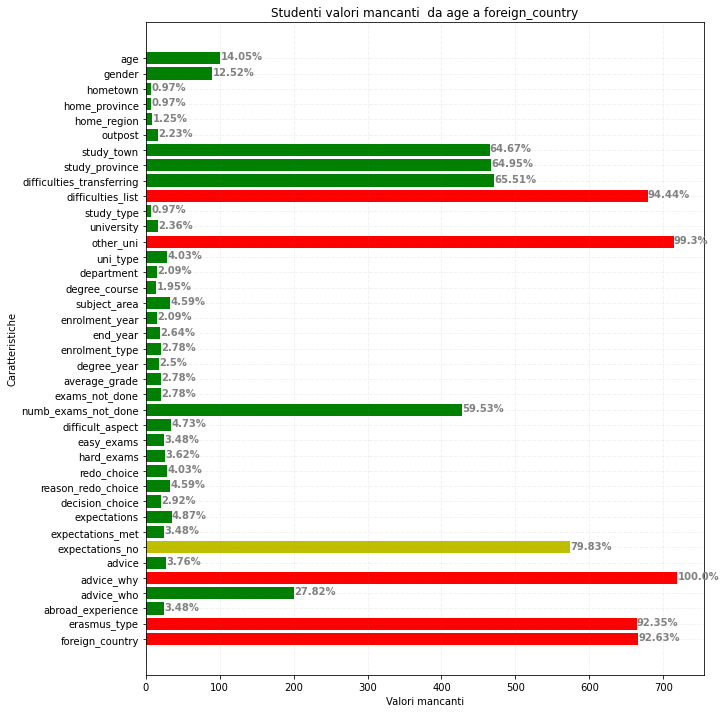

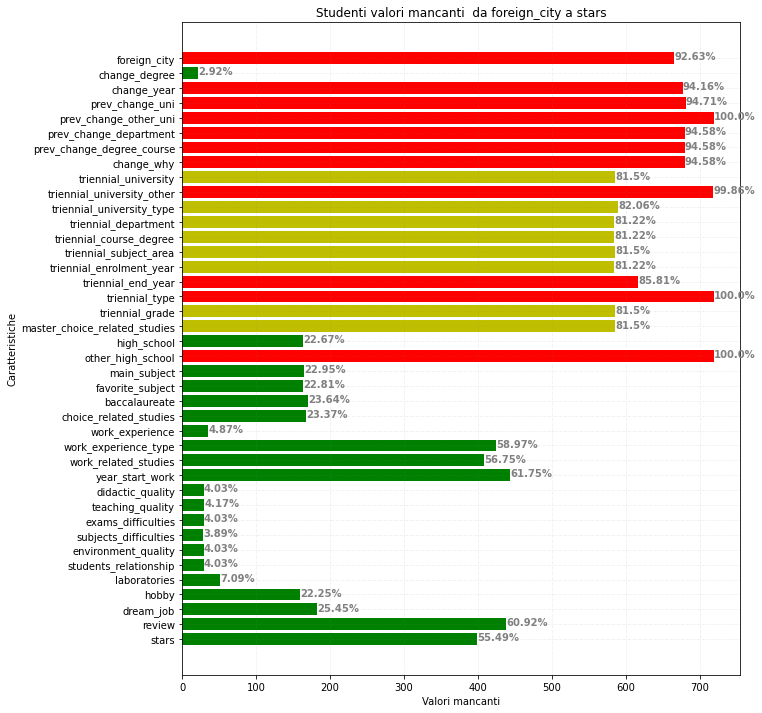

In [10]:
missing_value_graphs(df_missing_value_students, df_students, 'Studenti')

### <h5> 5.1.4) LAUREATI: grafico valori mancanti </h6>

61


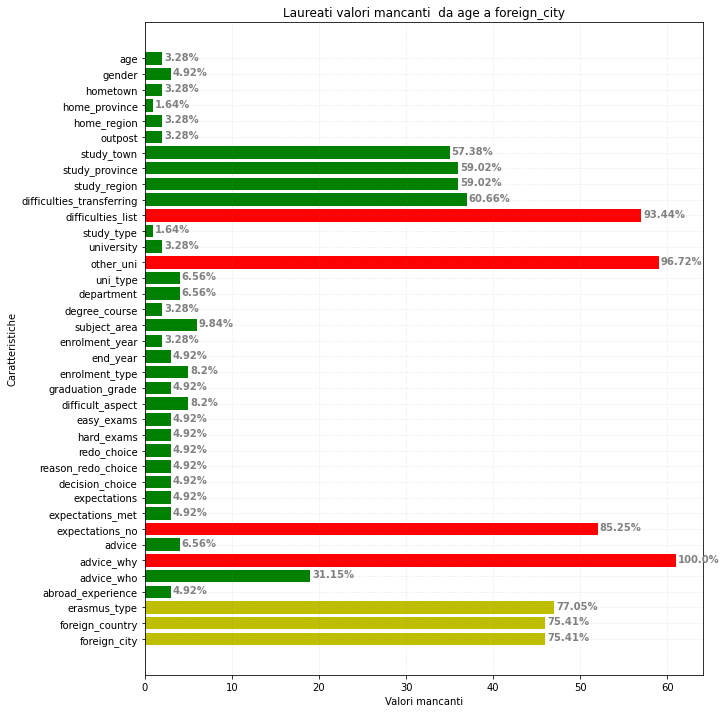

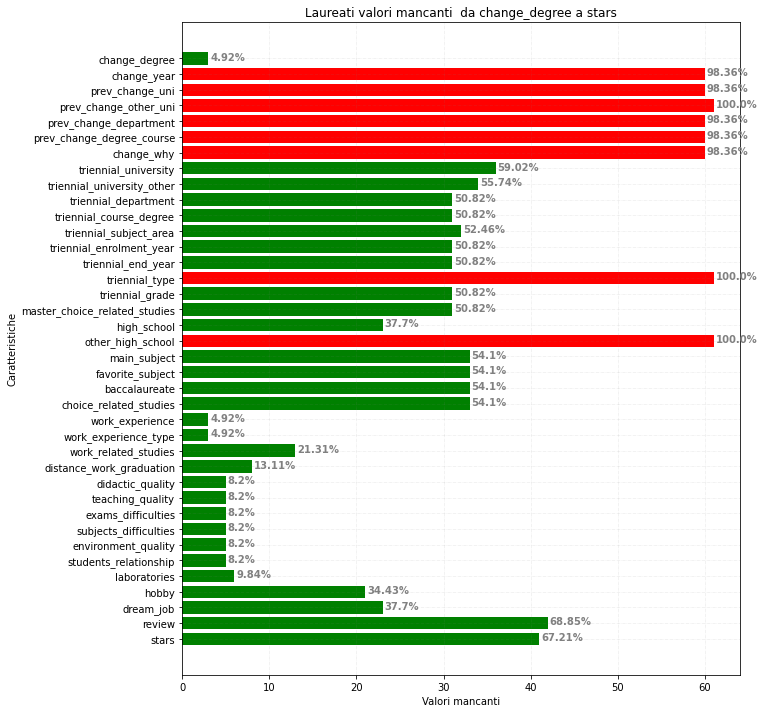

In [11]:
missing_value_graphs(df_missing_value_graduate, df_graduate, 'Laureati')

##<h5><b> 5.2) Recupero dati triennali e magistrali a ciclo unico</b><h5>

<p>Dopo un'accurata analisi dei valori abbiamo riscontrato un numero molto elevato di valori mancanti relativi alle lauree specialistiche che non avrebbe permesso una predizione finale ottimale. Abbiamo perciò optato per continuare la nostra ricerca con le lauree di primo livello.</p>

In [12]:
query_first_degree='study_type == "Triennale" | study_type == "Magistrale_unico"'
df_students_first_degree = df_students.query(query_first_degree)
df_graduate_first_degree = df_graduate.query(query_first_degree)
print('students first degree:',df_students_first_degree.shape)
print('graduates first degree:',df_graduate_first_degree.shape)


students first degree: (568, 79)
graduates first degree: (29, 76)


### <h5>5.2.1) Analisi valori mancanti specifica per le lauree di primo livello</h5>

In [13]:
df_missing_value_first_degree_students=df_students_first_degree.isnull().sum()
df_missing_value_first_degree_graduate=df_graduate_first_degree.isnull().sum()

####<h6> 5.2.1.1) STUDENTI: grafico valori mancanti</h6>

568


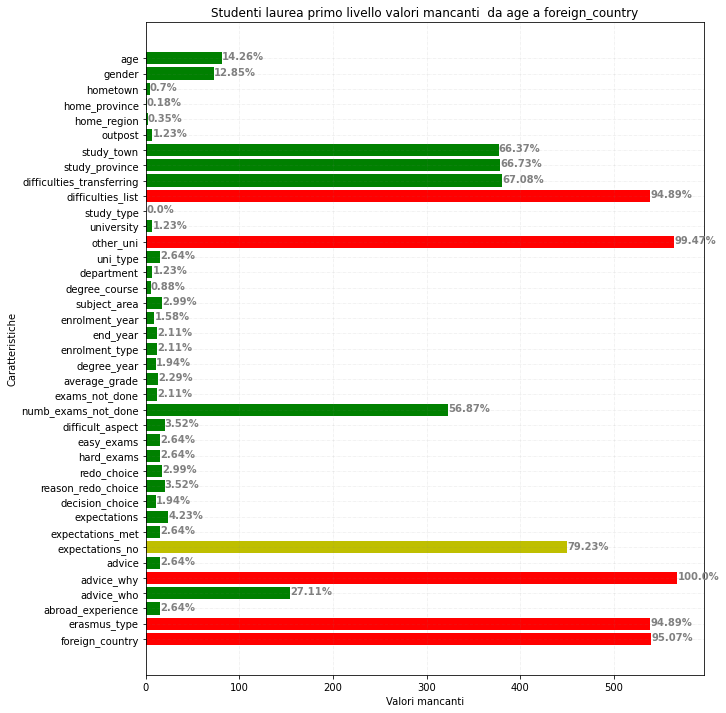

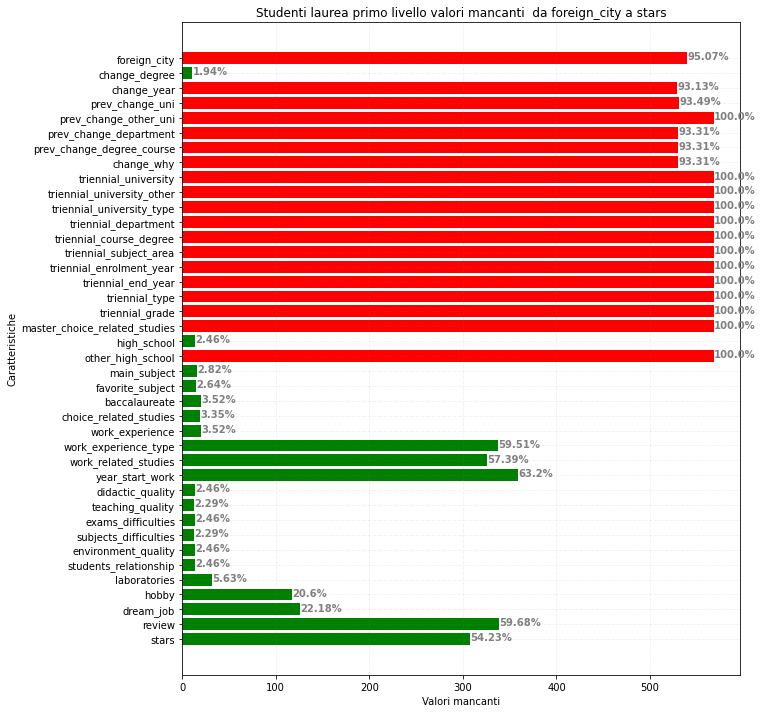

In [14]:
missing_value_graphs(df_missing_value_first_degree_students, df_students_first_degree, 'Studenti laurea primo livello')

#### <h6> 5.2.1.2)LAUREATI: grafico valori mancanti </h6>

29


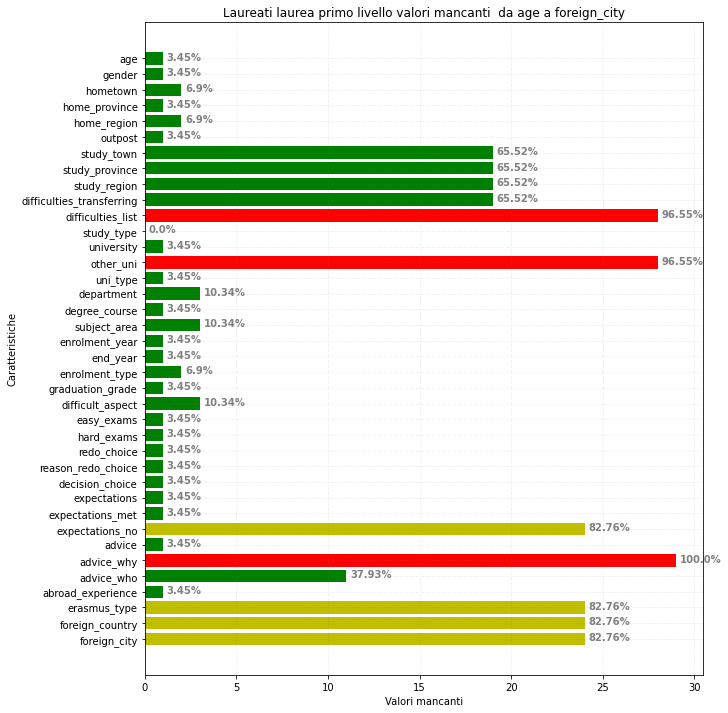

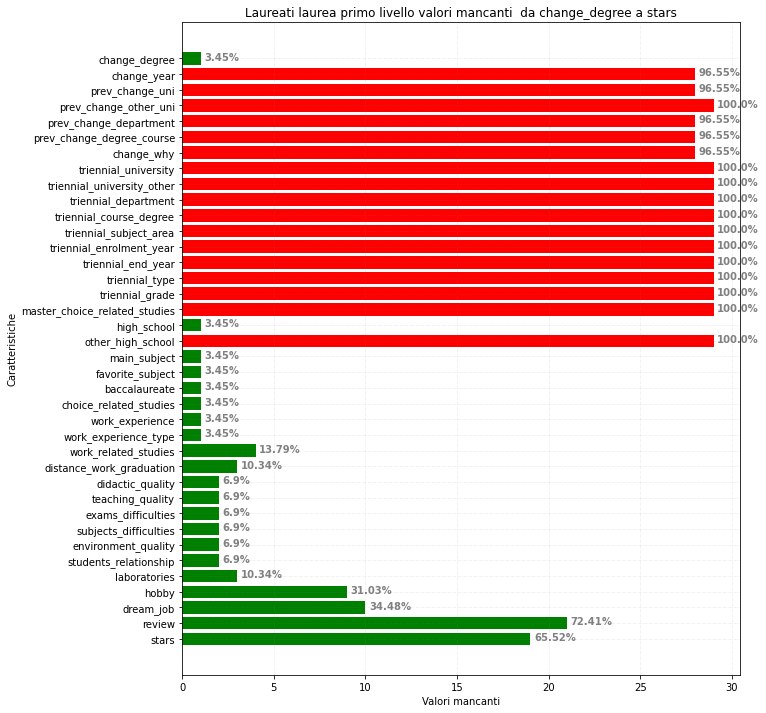

In [15]:
missing_value_graphs(df_missing_value_first_degree_graduate, df_graduate_first_degree, 'Laureati laurea primo livello')

##<h5><b>5.3) Selezione delle features</b></h5>
<p>Dopo una seconda analisi specifica dei valori mancanti relativi alle lauree di primo livello, abbiamo selezionato le features più consone per il nostro obiettivo finale e con un numero di valori mancanti ridotto, quali:</p>
<ul>
<li>Main Subject</li>
<li>Favorite Subject</li>
<li>Main Subject</li>
<li>Dream job</li>
<li>Hobby</li>
<li>High school</li>
<li>Decision Choice</li>
<li>Expectations </li>
<li>Choice Related Studies</li>
</ul>
<p>Abbiamo inoltre selezionato la feature <code> other high school </code>,nel caso fosse possibile raccogliere ulteriori dati. Questo campo sarà gestito  assieme al campo <code> high school </code> nei prossimi passaggi</p>.

In [16]:
features_first_degree=['degree_course','other_high_school','high_school','main_subject', 'favorite_subject', 'dream_job', 'hobby', 'decision_choice' , 'expectations', 'choice_related_studies' ]

###<h5> 5.3.1) Unione del dataset degli studenti con quello dei laureati per le features selezionate</h5>
<p>Poichè la nostra ricerca si concentrava sulle lauree di primo livello,   abbiamo unito i dataset concernenti laureandi e laureati che rientravano nel target, analizzando i dati ottenuti per effettuare una predizione più completa ed accurata</p>

In [17]:
all_features_dict={}
for feature in features_first_degree:
  all_features=df_students_first_degree[feature]
  all_features=all_features.append(df_graduate_first_degree[feature], ignore_index=True, verify_integrity=True)
  all_features_dict[feature]=all_features

df_all_features_first_degree=pd.DataFrame(all_features_dict)
print('original sample first degree:',df_all_features_first_degree.shape[0] )
df_all_features_first_degree.head()

original sample first degree: 597


degree_course  ...  choice_related_studies
0  ingegneria aerospaziale  ...                      SI
1     Economia e commercio  ...                      NO
2                 Medicina  ...                      NO
3    Medicina e chirurgia   ...                      NO
4         Infermieristica   ...                      NO

[5 rows x 10 columns]

##<h5><b> 5.5) Features cleaning</b></h5>

###<h5> 5.5.1) Eliminazione valori nulli </h5>


In [18]:
#count null values
df_all_features_first_degree.isnull().sum()

degree_course               6
other_high_school         597
high_school                15
main_subject               17
favorite_subject           16
dream_job                 136
hobby                     126
decision_choice            12
expectations               25
choice_related_studies     20
dtype: int64

In [19]:
for key in all_features_dict:
  if key!='main_subject' and key!='other_high_school':
    df_all_features_first_degree = df_all_features_first_degree[df_all_features_first_degree[key].notna()]
print('sample first degree after delete null value:',df_all_features_first_degree.shape[0])

sample first degree after delete null value: 422


### <h5>5.5.2) Gestione valori mancanti del <code>main_subject</code><h5>
<p> Per effettuare la gestione dei valori mancanti delle materie principali nel campo <code>main_subject</code> abbiamo ipotizzato che ciascuna categoria di scuole superiori abbia le stesse materie principali. </p>
<p> Conoscendo la scuola superiore, abbiamo perciò realizzato un algoritmo il cui scopo è replicare le materie mancanti data la scuola superiore. <br> Il funzionamento è il seguente: l'algoritmo cerca la prima riga non nulla contenete le materie principali relative a quella scuola superiore e le replica nel caso in cui la stessa scuola superiore abbia il campo della materia principale vuoto</p>


In [20]:
school_whitout_subject= df_all_features_first_degree['high_school'].loc[df_all_features_first_degree['main_subject'].isnull()]

In [21]:
full_subject=df_all_features_first_degree['main_subject']
high_school=np.array(df_all_features_first_degree['high_school'])
for x  in school_whitout_subject:
  subject=np.array(df_all_features_first_degree['main_subject'].loc[df_all_features_first_degree['high_school'].str.contains(x,na=False)][0:1])
  for i in range(0, len(high_school)):
    if (high_school[i]==x):
        full_subject[i]=np.array2string(subject)
df_all_features_first_degree['full_subject']=full_subject

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
#replace missing value in main subject whit the new value in full subject
df_all_features_first_degree['main_subject']=df_all_features_first_degree['main_subject'].combine_first(df_all_features_first_degree['full_subject'])
df_all_features_first_degree[['main_subject', 'full_subject']].head(50)

main_subject                                       full_subject
1                           matematica,fisica,scienze                          matematica,fisica,scienze
2                              Greco, latino,italiano                             Greco, latino,italiano
3                             Latino, greco, italiano                            Latino, greco, italiano
4    Greco, latino, italiano, letteratura, filosofia.   Greco, latino, italiano, letteratura, filosofia.
5       Diritto, economia inglese, francese, spagnolo      Diritto, economia inglese, francese, spagnolo
6                       Latino,greco,italiano,inglese                      ['matematica,fisica,scienze']
9                   Matematica,scienze,fisica,chimica                      ['matematica,fisica,scienze']
10                              Economia, informatica                              Economia, informatica
11  Matematica, fisica, italiano, chimica/scienze ...  Matematica, fisica, italiano, chimica/scienze ...
12                       Matematica, fisica, chimica                        Matematica, fisica, chimica 
14                 Scienze umane, filosofia, italiano                 Scienze umane, filosofia, italiano
16  Lingua spagnola, lingua tedesca, lingua ingles...                      ['matematica,fisica,scienze']
17              Economia, diritto, inglese, spagnolo               Economia, diritto, inglese, spagnolo 
19  Microbiologia ambientale, chimica organica ed ...  Microbiologia ambientale, chimica organica ed ...
20                             Latino, Greco, Scienze                      ['matematica,fisica,scienze']
21  Storia dell’arte, laboratorio audiovisivo, teo...                      ['matematica,fisica,scienze']
22                                 Matematica, Fisica                      ['matematica,fisica,scienze']
23           Matematica, Fisica, Informatica, Scienze           Matematica, Fisica, Informatica, Scienze
24           Matematica, scienze, fisica, letteratura           Matematica, scienze, fisica, letteratura
25             Economia aziendale, diritto, le lingue             Economia aziendale, diritto, le lingue
27              Latino, italiano, matematica, scienze              Latino, italiano, matematica, scienze
28  Matematica, scienze, italiano, inglese, fisica...                      ['matematica,fisica,scienze']
29                                Matematica , fisica                                Matematica , fisica
30  Greco, latino, letteratura italiana, storia e ...  Greco, latino, letteratura italiana, storia e ...
33  Visual Arts, Fisica, Matematica, Letteratura I...  Visual Arts, Fisica, Matematica, Letteratura I...
36                  Greco, Latino,Italiano, Filosofia                  Greco, Latino,Italiano, Filosofia
37                         Fisica, matematica, latino                         Fisica, matematica, latino
38  Greco, latino, italiano, storia, filosofia, ma...  Greco, latino, italiano, storia, filosofia, ma...
39                       Matematica, fisica, scienze                        Matematica, fisica, scienze 
41  Italiano, matematica, sistemi, tecnologie di p...  Italiano, matematica, sistemi, tecnologie di p...
43  Informatica, telecomunicazioni, tecnologie e p...  Informatica, telecomunicazioni, tecnologie e p...
44                                             Lingue                                             Lingue
45    Matematica, fisica, scienze, storia e filosofia    Matematica, fisica, scienze, storia e filosofia
46                                        Informatica                                        Informatica
47  Matematica,fisica,scienze,latino,disegno tecni...  Matematica,fisica,scienze,latino,disegno tecni...
48  Greco, latino, letteratura italiana, filosofia...  Greco, latino, letteratura italiana, filosofia...
49  Meccanica, disegno industriale, tecnologia mec...  Meccanica, disegno industriale, tecnologia mec...
50   Italiano, matematica, cucina, inglese, biologi

In [23]:
df_all_features_first_degree=df_all_features_first_degree.drop(['full_subject'], axis=1) #eliminate the support column

Eliminazione eventuali valori nulli rimasti ed aggiunta al dizionario con il resto delle colonne pulite

In [24]:
df_all_features_first_degree = df_all_features_first_degree[df_all_features_first_degree['main_subject'].notna()] #delete null values
print('sample first degree after delete null value:',df_all_features_first_degree.shape[0])

sample first degree after delete null value: 420


In [25]:
original_df_whitout_nan_value=df_all_features_first_degree.copy()

###<h5>5.5.3) Pulizia del target (<code>degree_course</code>)</h5>
<p>Poichè la nostra variabile target è stata immessa dall'utente come testo libero, abbiamo dovuto ripulirla per renderla idonea alla feature engineering.</p>
<p>Oltre alle normali procedure di pulizia del testo (stemming, eliminazione stopwords...) è stato necessario: <ul> 
<li>sostituire gli acronimi (che abbiamo trovato analizzando i dati) con il relativo corso di laurea</li>
<li>eliminare parole speciali e fuorvianti quali "curriculum", "indirizzo", "L-22".....</li>
<li>Fare un ulteriore pulizia manuale delle lauree scritte in maniera scorretta (invertito il nome ecc...)</li>
</ul></p>
<p>Per quest'ultima pulizia più approfondita è stata per noi cruciale la conoscienza del dominio</p>

In [26]:
#acronimi
slang_degree_course={"ctf":"chimica e tecnologie farmaceutiche",
       "clemi": "economia e marketing internazionale", 
       "sztpa": "scienze zootecniche e tecnologie delle produzioni animali", 
       "smid": "statistica matematica e trattamento informatico dati", 
       "clei": "economia internazionale",
       "clem": "economia e marketing", 
       "cle": "economia", 
       "dams": "discipline delle arti della musica e dello spettacolo",
       "ctc": "chimica e tecnologie chimiche",
       "pmts": "planning management of tourism systems",
       "eifi":  "lingue moderne comunicazione cooperazione internazionale",
       "lms":  "letteratura musica spettacolo"
        }
regex_degree_course=[r'\sl.*[0-9]+', r'\scurriculum\s.*', r'indirizzo.*', r'[(].*[)]*', r'&', r'\s\s+', r'corso di laurea', r'ciclo unico', r'’']

In [27]:
#delete null value
df_all_features_first_degree=df_all_features_first_degree[df_all_features_first_degree['degree_course'].notna()]

In [28]:
df_all_features_first_degree['degree_course']=data_cleaning(df_all_features_first_degree['degree_course'], regex_degree_course)
#replace slang
for key in slang_degree_course.keys():
  df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains(key), 'degree_course'] = slang_degree_course[key]

#another cleaning
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('medicina') & ~df_all_features_first_degree['degree_course'].str.contains('veterinaria'), 'degree_course'] = 'medicina e chirurgia'
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('informatica') & df_all_features_first_degree['degree_course'].str.contains('elettronica') & df_all_features_first_degree['degree_course'].str.contains('telecomunicazioni') , 'degree_course'] = 'ingegneria informatica elettronica e telecomunicazioni'
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('comunicazione e media per le industrie creative'), 'degree_course'] = 'comunicazione e media contemporanei per le industrie creative'
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('elettronica') & ~df_all_features_first_degree['degree_course'].str.contains('ingegneria' )& ~df_all_features_first_degree['degree_course'].str.contains('ing'), 'degree_course'] = 'ingegneria elettronica'
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('interfacce e tecnologie della comunicazion'), 'degree_course'] = 'interfacce uomo macchina e tecnologie della comunicazione'
df_all_features_first_degree.loc[df_all_features_first_degree['degree_course'].str.contains('letteratura musica e spettacolo'), 'degree_course'] = 'letteratura musica e spettacolo'
df_all_features_first_degree['degree_course']=df_all_features_first_degree['degree_course'].str.replace(r'(^ingegneria\s*)|(^ingegneria)', 'ing ')
df_all_features_first_degree['degree_course']=df_all_features_first_degree['degree_course'].str.replace('ingeneria ', 'ing ')
df_all_features_first_degree['degree_course']

1                        economia e commercio
2                        medicina e chirurgia
3                        medicina e chirurgia
4                             infermieristica
5      montaggio cinematografico e televisivo
                        ...                  
590                           ing informatica
591                                      ing 
592                      medicina e chirurgia
594                           scienze motorie
596               beni culturali e spettacolo
Name: degree_course, Length: 420, dtype: object

In [29]:
df_all_features_first_degree['degree_course']=preprocessing_text(df_all_features_first_degree, df_all_features_first_degree['degree_course'], 'degree_course', 'IT-EN')

In [30]:
#DEBUG: print the unique degree_course after the cleaning
unique_degree_course=np.unique(df_all_features_first_degree['degree_course'])
print(len(unique_degree_course))
print(unique_degree_course)

144
['archeolog' 'architettur' 'arti scienz spettacol' 'autom industrial'
 'ben artist spettacol' 'ben cultural' 'ben cultural spettacol' 'biolog'
 'biolog molecol' 'biotecnolog' 'chimic' 'chimic tecnolog chimic'
 'chimic tecnolog farmaceut' 'civilt lingu stran mod' 'comun' 'comun med'
 'comun med contemporane industr creativ' 'comun med pubblic' 'design'
 'design prodott industrial' 'dietist' 'digital marketing'
 'direzion impres' 'diritt tecnolog' 'disciplin arti music spettacol'
 'econom' 'econom amministr impres' 'econom aziendal' 'econom commerc'
 'econom finanz' 'econom internazional' 'econom management'
 'econom management nuov tecnolog digital'
 'econom marketing internazional' 'econom marketing management'
 'econom merc digital' 'econom merc istitu' 'economì management' 'farmac'
 'filosof' 'fisic' 'food system' 'gestion aziendal' 'giurisprudt'
 'graphic design' 'infermierist' 'informat' 'ing' 'ing ambiental'
 'ing biomed' 'ing chimic material' 'ing civil ambiental edil'
 'ing 

###<h5>5.5.5) Unione tra <code>high_school</code> e <code>other_high_school</code></h5>
<p> Questa unione è stata pensata nel caso in cui un studente frequentasse una scuola superiore particolare non facente parte dell'elenco che abbiamo fornito agli studenti</p>



In [31]:
#need to merge 2 columns
df_all_features_first_degree['high_school']=df_all_features_first_degree['high_school'].replace('altro', np.NaN ) 


In [32]:
#merge columns
df_all_features_first_degree['high_school']=df_all_features_first_degree['high_school'].combine_first(df_all_features_first_degree['other_high_school'])

In [33]:
df_all_features_first_degree['high_school']=df_all_features_first_degree['high_school'].replace(np.NaN,'altro')

In [34]:
#delete support column
df_all_features_first_degree=df_all_features_first_degree.drop(['other_high_school'], axis=1) 
df_all_features_first_degree.head()

degree_course  ... choice_related_studies
1                econom commerc  ...                     NO
2               medicin chirurg  ...                     NO
3               medicin chirurg  ...                     NO
4                  infermierist  ...                     NO
5  montagg cinematograf televis  ...                     NO

[5 rows x 9 columns]

### <h5>5.5.6) Controllo finale che non ci siano più valori nulli</h5>

In [35]:
df_all_features_first_degree.isnull().sum()

degree_course             0
high_school               0
main_subject              0
favorite_subject          0
dream_job                 0
hobby                     0
decision_choice           0
expectations              0
choice_related_studies    0
dtype: int64

##<h5><b>5.6) Pulizia delle features</b></h5>
<p> In questa fase abbiamo effettuato la pulizia di tutte le features del nostro dataset. Poichè le nostre caratteristiche sono testuali/categoriali, abbiamo provveduto a:</p>
<ul>
<li>Mettere tutte le parole in minuscolo</li>
<li>Eliminare la punteggiatura</li>
<li>Eliminare caratteri speciali o spazi bianchi in eccesso</li>
<li>Stemming: estrazione della radice dalle parole (solo per le carateristiche testuali)</li>
<li>Eliminazione delle stopwords,ovvero parole inutili ai fini dell'analisi, come le congiunzioni</li>
<li>Tokenization: trasformazione delle parole in token (solo per le caratteristiche testuali)
</ul>

In [36]:
df_clean_features=df_all_features_first_degree.copy()

In [37]:
categorical_features=['high_school', 'choice_related_studies']
regex_features=[r'\s\s+'] #delete black space
for feature in df_clean_features.columns:
  if feature != 'degree_course':
    df_clean_features[feature]=data_cleaning(df_clean_features[feature], regex_features)
    if feature not in categorical_features:
      df_clean_features[feature]=preprocessing_text(df_clean_features,df_clean_features[feature], feature, 'IT')

In [38]:
#DEBUG: comparison between dirty data and clean data
for feature in df_clean_features.columns: 
  display(pd.merge(df_all_features_first_degree[feature], df_clean_features[feature], right_index = True,left_index = True))
index_clean_features=df_clean_features.index #need to the final

degree_course_x               degree_course_y
1                  econom commerc                econom commerc
2                 medicin chirurg               medicin chirurg
3                 medicin chirurg               medicin chirurg
4                    infermierist                  infermierist
5    montagg cinematograf televis  montagg cinematograf televis
..                            ...                           ...
590                  ing informat                  ing informat
591                           ing                           ing
592               medicin chirurg               medicin chirurg
594                  scienz motor                  scienz motor
596        ben cultural spettacol        ben cultural spettacol

[420 rows x 2 columns]

high_school_x               high_school_y
1             Liceo Scientifico           liceo scientifico
2                Liceo Classico              liceo classico
3                Liceo Classico              liceo classico
4                Liceo Classico              liceo classico
5    Istituto tecnico economico  istituto tecnico economico
..                          ...                         ...
590           Liceo Scientifico           liceo scientifico
591   Istituto tecnico geometri   istituto tecnico geometri
592           Liceo Scientifico           liceo scientifico
594  Istituto tecnico economico  istituto tecnico economico
596                       IPSIA                       ipsia

[420 rows x 2 columns]

main_subject_x                                     main_subject_y
1                            matematica,fisica,scienze                               matemat fisic scienz
2                               Greco, latino,italiano                                    grec latin ital
3                              Latino, greco, italiano                                    latin grec ital
4     Greco, latino, italiano, letteratura, filosofia.                 grec latin ital letteratur filosof
5        Diritto, economia inglese, francese, spagnolo               diritt econom ingles frances spagnol
..                                                 ...                                                ...
590                   Matematica, Scienze, Informatica                            matemat scienz informat
591  Costruzioni, topografia, disegno, tecnologia d...     costruzion topograf disegn tecnolog costruzion
592                                           Scienze                                              scienz
594                                        Ragioneria                                            ragioner
596  Disegno per la moda, modellistica e confezione...  disegn mod modellist confezion stor mod stor arte

[420 rows x 2 columns]

favorite_subject_x             favorite_subject_y
1                                           matematica                        matemat
2                                     Non ne avevo una                               
3                                              Latino                           latin
4                                           Filosofia                         filosof
5                                              Diritto                         diritt
..                                                 ...                            ...
590                                          Filosofia                        filosof
591                                        costruzioni                     costruzion
592                                        Matematica                         matemat
594                                          Italiano                            ital
596  Disegno per la moda, storia della moda e stori...  disegn mod stor mod stor arte

[420 rows x 2 columns]

dream_job_x                      dream_job_y
1                               consulente finanziario              consulent finanziar
2                                            Radiologo                         radiolog
3                   Diventare un medico specializzato           divent medic specializz
4                        Infermiere di sala operatoria              inferm sal operator
5                           Montatrice cinematografica           montatric cinematograf
..                                                 ...                              ...
590                                       Imprenditore                      imprenditor
591          calcio professionistico (come allenatore)         calc professionist allen
592                                            Medico                             medic
594                                   Palestra salute                       palestr sal
596  Diventare una figurinista di moda o designer d...  divent figurin mod designer mod

[420 rows x 2 columns]

hobby_x                                  hobby_y
1                                          videogiochi                                videogioc
2                        Ascoltare musica, vedere film                    ascolt music ved film
3                                             Atletica                                    atlet
4                         Musica (batteria), biliardo.                     music batter biliard
5                Cinema, viaggi, lettura, arte, musica            cinem viagg lettur arte music
..                                                 ...                                      ...
590  Calcio, amici, programmazione web, investiment...     calc amic programm web invest finanz
591                                    calcio, lettura                              calc lettur
592                                              Nuoto                                     nuot
594                                Fotografia, animali                          fotograf animal
596  Viaggiare, leggere tanto, disegnare moda e asc...  viagg legg tant disegn mod ascolt music

[420 rows x 2 columns]

decision_choice_x             decision_choice_y
1    la mia voglia di intraprendere questo percorso...  vogl intraprend percors stud
2                      La predisposizione alla materia          predisposizion mater
3               Ho sempre voluto fare questo mestiere             sempr vol far mest
4    Il desiderio di poter dare una mano a chi ne h...  desider poter dar man bisogn
5                La mia grande passione per il cinema            grand passion cinem
..                                                 ...                           ...
590                  Consciamente nessuno mi ha spinto            consc nessun spint
591         Era la prosecuzione degli studi precedenti        prosecu stud precedent
592                                                  X                             x
594                                  Il mio interesse                       interess
596      Passione per la storia e la storia dell'arte         passion stor stor arte

[420 rows x 2 columns]

expectations_x                                     expectations_y
1                               quello che sto vivendo                                                viv
2                Di riuscire a proseguire con facilità                                riusc prosegu facil
3    Sicuramente lungo e faticoso ma spero soddisfa...             sicur lung fatic sper soddisfacent fin
4    Tutto quello che ho effettivamente incontrato ...  effett incontr percors fors men mater umanist ...
5    Mi aspettavo di riuscire ad imparare un mestie...           aspett riusc impar mest molt cors pratic
..                                                 ...                                                ...
590  Forse speravo di programmare un po' di più. Av...  fors sper programm po prefer far progett men esam
591                              Quello che ho trovato                                               trov
592                                                  X                                                  x
594                       Più pratica ma va bene così                                   pratic va ben cos
596                     Materie più attinenti al corso                                mater attinent cors

[420 rows x 2 columns]

choice_related_studies_x choice_related_studies_y
1                         NO                       no
2                         NO                       no
3                         NO                       no
4                         NO                       no
5                         NO                       no
..                       ...                      ...
590                       SI                       si
591                       SI                       si
592                       SI                       si
594                       NO                       no
596                       SI                       si

[420 rows x 2 columns]

#<h4> 6)FEATURES BUILDING</h4>

##<h5><b>6.1) Variabile target-> <code>degree_course</code></b></h5>
<p>Per i corsi di laurea è stato usato un algoritmo di clustering con lo scopo di raggruppare i corsi di laurea  in vari cluster contenenti quelli più simili testualmente tra di loro. Il risultato ottenuto sono stati 120 cluster.</p>
<p>Innanzitutto abbiamo utilizzato la <b>text-analysis con il modello tf-id</b>, più preciso ed efficace del modello bag of words in quanto tiene conto dell'ordine dei token nella frase.</p>
<p>Successivamente abbiamo sfruttato l'algoritmo di <b>cosine similarity</b>, che permette di calcolare la distanza tra una parola e l'altra.</p>
<p>Infine abbiamo applicato l'algoritmo <b>KMeans</b>, per effettuare i vari raggruppamenti</p>
<p>Per concludere abbiamo soprannominato ogni gruppo con il nome originale (non pulito) della sua prima laurea, al fine di semplificare la visualizzazione dei grafici finali di lettura del modello</p>

In [39]:
#text analysis
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
vectorize_matrix=tf_vector(tv, df_clean_features['degree_course'])
vectorize_matrix

alimentar  ambient  ambiental  amministr  ...  uman  uom  veterinar  zootecn
0          0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
1          0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
2          0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
3          0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
4          0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
..         ...      ...        ...        ...  ...   ...  ...        ...      ...
415        0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
416        0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
417        0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
418        0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0
419        0.0      0.0        0.0        0.0  ...   0.0  0.0        0.0      0.0

[420 rows x 142 columns]

In [40]:
#cosine similarity
similarity_matrix = cosine_similarity(vectorize_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df.head()

0    1    2    3    4    5    6    ...  413  414  415  416  417  418  419
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
2  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 420 columns]

In [41]:
#clustering
km = KMeans(n_clusters=120, random_state=0)
km.fit_transform(similarity_df)
cluster_labels = km.labels_
cluster_labels_degree_course = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
df_clean_features= df_clean_features.set_index(cluster_labels_degree_course.index) #avoids NAN values ​​coming out due to different indexes
cluster_labels_degree_course.insert(0,'degree_course',df_clean_features['degree_course'], True)
original_df_whitout_nan_value= original_df_whitout_nan_value.set_index(cluster_labels_degree_course.index) #avoids NAN values ​​coming out due to different indexes
cluster_labels_degree_course.insert(0,'full_degree_course',original_df_whitout_nan_value['degree_course'], True)
byCluster=cluster_labels_degree_course.groupby(['ClusterLabel'])


In [42]:
#DEBUG: print all the cluster
labels = []
for cluster, degree in byCluster:
    print(f"All entries for {cluster!r}")
    print("------------------------")
    print(degree, end="\n\n")   #display(degree)
    labels.append(degree['full_degree_course'].iloc[0])
print(labels)

All entries for 0
------------------------
    full_degree_course degree_course  ClusterLabel
125        Archeologia     archeolog             0

All entries for 1
------------------------
            full_degree_course degree_course  ClusterLabel
29      Ingegneria informatica  ing informat             1
30      Ingegneria Informatica  ing informat             1
33      Ingegneria informatica  ing informat             1
74      Ingegneria informatica  ing informat             1
91            Ing. Informatica  ing informat             1
106     Ingegneria informatica  ing informat             1
121     ingegneria informatica  ing informat             1
142    Ingegneria informatica   ing informat             1
170     Ingegneria Informatica  ing informat             1
183     Ingegneria informatica  ing informat             1
191     ingegneria informatica  ing informat             1
198     Ingegneria informatica  ing informat             1
224     Ingegneria Informatica  ing informat

In [43]:
#put the cluster result inside the dataset

df_clean_features=df_clean_features.set_index(cluster_labels_degree_course.index)
df_clean_features['degree_course']=cluster_labels_degree_course['ClusterLabel']
#DEBUG
print('check if add missing values:', df_clean_features['degree_course'].isnull().sum())


check if add missing values: 0


##<h5><b> 6.2) Caratteristiche categoriali <b></h5>
<p> Per codificare delle caratteristiche categoriali e binomiali, abbiamo usato l'algoritmo di <code>one hot encoding</code></p>

In [44]:
encoder_school= LabelEncoder()
encoder_choice= LabelEncoder()
for feature in categorical_features:
  print(feature)
  if feature == 'high_school':
    school_labels = encoder_school.fit_transform( df_clean_features[feature]) 
    df_clean_features[feature]=one_hot_encoding( df_clean_features[feature], feature, school_labels, encoder_school )
  if feature == 'choice_related_studies':
    choice_labels = encoder_choice.fit_transform(df_clean_features[feature]) 
    df_clean_features[feature]=one_hot_encoding( df_clean_features[feature], feature, choice_labels,encoder_choice )

high_school
encoding high_school : {0: 'altro', 1: 'ipsia', 2: 'istituto professionale agrario ', 3: 'istituto professionale alberghiero', 4: 'istituto professionale economico ', 5: 'istituto tecnico agrario', 6: 'istituto tecnico alberghiero', 7: 'istituto tecnico economico', 8: 'istituto tecnico geometri', 9: 'istituto tecnico industriale', 10: 'liceo artistico', 11: 'liceo classico', 12: 'liceo linguistico', 13: 'liceo musicale', 14: 'liceo scientifico', 15: 'liceo scienze umane'}
choice_related_studies
encoding choice_related_studies : {0: 'no', 1: 'si'}


In [45]:
school_labels #DEBUG


array([14, 11, 11, 11,  7, 11, 14,  7, 14, 14, 15,  7,  0,  0, 11, 10, 14,
        0, 14,  7, 14, 14, 14, 11,  0, 11, 14, 11, 14,  9,  9, 12, 14,  0,
       14, 11,  9,  6, 12, 15, 10, 15,  7, 11,  5,  7,  9, 15, 15, 15, 14,
        7, 14, 14,  0, 14,  8, 14,  1,  1, 11, 11,  5, 11, 12, 14, 14,  3,
        7,  9,  9,  7, 14, 14,  9, 14,  9, 12, 12,  7, 14, 14,  2, 14,  7,
        7,  7, 12,  9,  4,  7,  9, 14, 11, 12, 12,  5, 15, 14, 12,  6, 14,
       14,  7, 11, 14, 14,  9,  7, 14, 12,  9, 12, 15, 15,  0, 11,  8, 14,
       11,  6,  9, 12, 14, 15,  0,  7, 14, 14,  0, 14,  7,  7, 15, 14, 14,
       14, 14, 15, 14,  0, 14,  9, 12, 14,  7, 12,  8,  7, 12, 15, 14, 14,
       14, 14,  7, 14,  9, 15, 14,  1, 15, 12, 11, 11, 12, 14, 14,  0,  7,
        9, 14, 12, 13, 10, 12,  7,  7,  7,  7,  5, 14, 14,  8, 15, 15, 12,
       14,  7, 14,  7, 14, 12,  0, 14, 14, 14, 12,  9, 14,  0, 14,  7,  5,
        9, 15, 14, 14, 12, 14,  7, 15, 14,  0, 15, 14, 15,  8, 14, 14,  9,
        5,  0, 14, 14, 14

##<h5><b>6.3) Caratteristiche testuali-> text analysis</b></h5>
<p>Abbiamo deciso di utilizzare due modelli diiferenti per codificare le variabili testuali: il modello <code> Bag of words </code> e il modello <code> TF-IDF</code></p>
<p> La differenza principale fra essi è la maggiore accuratezza del secondo in quanto considera l'ordine in cui compaiono le parole nelle frasi</p>

### <h5>6.3.1) Modello bag of words</h5>
<p>Questo modello è stato utilizzato per tutte quelle features contenenti un elenco testuale, dove perciò era ininfluente l'ordine delle parole ai fini del significato finale. Alcuni campi dove è stato sfruttato questo modello sono:</p>
<ul>
<li> Le materie principali</li>
<li> Le materie preferite</li>
<li> Gli hobby</li>
<li> Il lavoro sognato <li>
</ul>


In [46]:
#group all the columns in one columns using a list, the we convert the list in string
df_clean_features['bag_of_words']=df_clean_features[['main_subject', 'hobby' , 'favorite_subject', 'dream_job' ]].values.tolist()
for index in df_clean_features['bag_of_words'].index:
  item=df_clean_features['bag_of_words'].iloc[index]
  listToStr = ' '.join([str(i) for i in item])
  df_clean_features['bag_of_words'].iloc[index]=listToStr



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [47]:
#fit the model
vectorizer_train = CountVectorizer(min_df=0, binary=True)
df_bow_dict=bag_of_words(vectorizer_train, df_clean_features['bag_of_words'])
df_bow_dict

118  3d  abbandon  accadem  accoglit  ...  world  yog  york  zon  zootecn
0      0   0         0        0         0  ...      0    0     0    0        0
1      0   0         0        0         0  ...      0    0     0    0        0
2      0   0         0        0         0  ...      0    0     0    0        0
3      0   0         0        0         0  ...      0    0     0    0        0
4      0   0         0        0         0  ...      0    0     0    0        0
..   ...  ..       ...      ...       ...  ...    ...  ...   ...  ...      ...
415    0   0         0        0         0  ...      0    0     0    0        0
416    0   0         0        0         0  ...      0    0     0    0        0
417    0   0         0        0         0  ...      0    0     0    0        0
418    0   0         0        0         0  ...      0    0     0    0        0
419    0   0         0        0         0  ...      0    0     0    0        0

[420 rows x 911 columns]

In [48]:
#delete the old columns
df_clean_features=df_clean_features.drop(['main_subject', 'hobby' , 'favorite_subject', 'dream_job', 'bag_of_words'], axis=1)


In [49]:
df_clean_features.head() #DEBUG

degree_course  ...  choice_related_studies
0             57  ...                       0
1              2  ...                       0
2              2  ...                       0
3             14  ...                       0
4            108  ...                       0

[5 rows x 5 columns]

In [50]:
#add the new columns
df_clean_features=df_clean_features.set_index(df_bow_dict.index)
df_clean_features=pd.concat([df_clean_features,  df_bow_dict], axis=1)


In [51]:
df_clean_features.head() #DEBUG


degree_course  high_school               decision_choice  ... york  zon  zootecn
0             57           14  vogl intraprend percors stud  ...    0    0        0
1              2           11          predisposizion mater  ...    0    0        0
2              2           11            sempr vol far mest  ...    0    0        0
3             14           11  desider poter dar man bisogn  ...    0    0        0
4            108            7           grand passion cinem  ...    0    0        0

[5 rows x 916 columns]

In [52]:
df_clean_features.shape

(420, 916)

In [53]:
df_clean_features.isnull().sum()

degree_course             0
high_school               0
decision_choice           0
expectations              0
choice_related_studies    0
                         ..
world                     0
yog                       0
york                      0
zon                       0
zootecn                   0
Length: 916, dtype: int64

###<h5>6.3.2) Modello TF-IDF</h5>
<p>Questo modello è stato usato per codificare le features contenenti frasi, dove perciò l'oridende delle parole avrebbe influito sul significato finale in quanto in base alla disposizione delle parole esso può variare</p>
<p>Abbiamo perciò utilizzato questo modello per codificare:</p>
<ul>
<li> Le aspettative</li>
<li> Il motivo della scelta</li>
</ul>

In [54]:
#group all the columns in one columns using a list, then we convert the list in string
df_clean_features['tf_if']=df_clean_features[['expectations', 'decision_choice']].values.tolist()
for index in df_clean_features['tf_if'].index:
  item=df_clean_features['tf_if'].iloc[index]
  listToStr = ' '.join([str(i) for i in item])
  df_clean_features['tf_if'].iloc[index]=listToStr


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [55]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
df_tf_id=tf_vector(tv, df_clean_features['tf_if'])
df_tf_id

15  2015   25  360  abbast  ...  workshop  youtub  zon  zoolog  zootecn
0    0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
1    0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
2    0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
3    0.0   0.0  0.0  0.0    0.25  ...       0.0     0.0  0.0     0.0      0.0
4    0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
..   ...   ...  ...  ...     ...  ...       ...     ...  ...     ...      ...
415  0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
416  0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
417  0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
418  0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0
419  0.0   0.0  0.0  0.0    0.00  ...       0.0     0.0  0.0     0.0      0.0

[420 rows x 1019 columns]

In [56]:
df_clean_features=df_clean_features.drop(['expectations', 'decision_choice', 'tf_if'], axis=1)

In [57]:
df_clean_features=df_clean_features.set_index(df_tf_id.index)
df_clean_features=pd.concat([df_clean_features,  df_tf_id], axis=1)

In [58]:
df_clean_features.head() #DEBUG

degree_course  high_school  choice_related_studies  ...  zon  zoolog  zootecn
0             57           14                       0  ...  0.0     0.0      0.0
1              2           11                       0  ...  0.0     0.0      0.0
2              2           11                       0  ...  0.0     0.0      0.0
3             14           11                       0  ...  0.0     0.0      0.0
4            108            7                       0  ...  0.0     0.0      0.0

[5 rows x 1933 columns]

In [59]:
df_clean_features.shape

(420, 1933)

In [60]:
df_clean_features.isnull().sum()

degree_course             0
high_school               0
choice_related_studies    0
118                       0
3d                        0
                         ..
workshop                  0
youtub                    0
zon                       0
zoolog                    0
zootecn                   0
Length: 1933, dtype: int64

#<h4>7) Creazione del dataset

In [61]:
X=df_clean_features.iloc[:, 1:]
y=df_clean_features['degree_course']

In [62]:
X #DEBUG

high_school  choice_related_studies  118  3d  ...  youtub  zon  zoolog  zootecn
0             14                       0    0   0  ...     0.0  0.0     0.0      0.0
1             11                       0    0   0  ...     0.0  0.0     0.0      0.0
2             11                       0    0   0  ...     0.0  0.0     0.0      0.0
3             11                       0    0   0  ...     0.0  0.0     0.0      0.0
4              7                       0    0   0  ...     0.0  0.0     0.0      0.0
..           ...                     ...  ...  ..  ...     ...  ...     ...      ...
415           14                       1    0   0  ...     0.0  0.0     0.0      0.0
416            8                       1    0   0  ...     0.0  0.0     0.0      0.0
417           14                       1    0   0  ...     0.0  0.0     0.0      0.0
418            7                       0    0   0  ...     0.0  0.0     0.0      0.0
419            1                       1    0   0  ...     0.0  0.0     0.0      0.0

[420 rows x 1932 columns]

In [63]:
y

0       57
1        2
2        2
3       14
4      108
      ... 
415      1
416     48
417      2
418     72
419     52
Name: degree_course, Length: 420, dtype: int32

##<h5><b>7.1) Bilanciamento delle classi</b></h5>
<p> Poichè le nostre classi (i corsi di laurea) non sono rappresentate in modo approssimativamente uguale, è stato necessario bilanciare le classi. In questa fase l'obiettivo principale è stato perdere meno dati possibili, il che ha portato a escludere un <code>algoritmo di undersampling</code>, cui risultato sarebbe stata la riduzione del numero dei campioni nelle classi più numerose.  Abbiamo invece optato per un' <code>algoritmo di oversampling</code>, cui scopo è di aumentare il numero dei campioni delle classi meno numerose.</p>
<p> In particolare abbiamo usato l'algoritmo<code> RandomOverSampler</code> della libreria <i>imblearn</i></p>

In [64]:
print('number of sample before:', Counter(y)) #DEBUG: see the number of sample before oversampling
oversample = RandomOverSampler(sampling_strategy='auto')
X, y= oversample.fit_resample(X, y)
print('number of sample after:', Counter(y)) #DEBUG: see the number of sample after oversampling

number of sample before: Counter({2: 30, 1: 21, 3: 18, 12: 17, 6: 15, 4: 13, 15: 10, 13: 10, 5: 9, 11: 9, 14: 8, 39: 8, 52: 8, 25: 7, 31: 7, 30: 6, 28: 6, 29: 6, 21: 6, 26: 6, 33: 5, 17: 5, 37: 5, 60: 4, 63: 4, 75: 4, 32: 4, 35: 4, 70: 4, 36: 4, 8: 4, 50: 4, 43: 4, 19: 4, 49: 4, 20: 4, 71: 3, 16: 3, 22: 3, 41: 3, 44: 3, 65: 3, 9: 3, 66: 3, 57: 2, 61: 2, 42: 2, 56: 2, 10: 2, 58: 2, 79: 2, 46: 2, 38: 2, 62: 2, 51: 2, 64: 2, 114: 2, 80: 2, 78: 2, 93: 2, 59: 2, 82: 2, 27: 2, 87: 2, 55: 2, 34: 2, 72: 2, 116: 2, 77: 2, 24: 2, 48: 2, 83: 2, 45: 2, 67: 2, 54: 2, 23: 2, 40: 2, 108: 1, 118: 1, 111: 1, 47: 1, 90: 1, 95: 1, 94: 1, 117: 1, 101: 1, 97: 1, 92: 1, 91: 1, 105: 1, 98: 1, 110: 1, 74: 1, 107: 1, 0: 1, 106: 1, 69: 1, 86: 1, 7: 1, 100: 1, 104: 1, 99: 1, 115: 1, 73: 1, 112: 1, 113: 1, 89: 1, 18: 1, 53: 1, 119: 1, 68: 1, 88: 1, 76: 1, 109: 1, 103: 1, 81: 1, 102: 1, 85: 1, 84: 1, 96: 1})
number of sample after: Counter({57: 30, 2: 30, 14: 30, 108: 30, 118: 30, 111: 30, 47: 30, 61: 30, 90: 30, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###<h5><b>7.2) Suddivisione nel set di test e di addestramento</b></h5>
<p>In questa fase abbiamo testato gli algoritmi con 4 test set e train set differenti,con lo scopo di verificare in quale caso la predizione fosse migliore e più accurata</p>

In [65]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=42)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.50, random_state=42)
X_train_66, X_test_66, y_train_66, y_test_66 = train_test_split(X, y, test_size=0.66, random_state=42)
X_train_list=[X_train_20, X_train_33, X_train_50, X_train_66]
y_train_list=[y_train_20, y_train_33, y_train_50, y_train_66]
X_test_list=[X_test_20, X_test_33, X_test_50, X_test_66]
y_test_list=[y_test_20, y_test_33, y_test_50, y_test_66]
keys_list=['test_20%', 'test_33%', 'test_50%', 'test_66%']

#<h4>8) PROCESSI DI ADDESTRAMENTO E TECNICHE/ALGORITMI UTILIZZATI</h4> 
<p> Il dataset è stato prima suddiviso in 4 train/test set differenti e successivamente ogni set è stato addestrato con 4 algoritmi di <code>ensemble learning</code> differenti.<br> Infine è stato creato un algoritmo che, prendendo in input i risultati di ciascuna predizione confrontasse i risultati per ottenere in output l'algoritmo migliore e il set migliore su cui addestrare quest'algoritmo</p>

##<h5><b> 8.1) Ensemble Voting</b></h5>

<p>Un voting ensemble (anche chiamato “majority voting ensemble“) è un modello ensemble di machine learning che combina le predizioni di più modelli. Può essere utilizzato per la classificazione o la regressione. Nel caso della regressione, ciò comporta il calcolo della media delle previsioni dai modelli. Nel caso della classificazione vengono sommati i pronostici per ogni etichetta e si pronostica l'etichetta con il voto di maggioranza.
<br>
<b>Regression Voting Ensemble: </b> le previsioni sono la media dei modelli che contribuiscono.<br>
<b>Classification Voting Ensemble:</b> le previsioni sono il voto di maggioranza dei modelli che contribuiscono.

Vi sono due possibili approcci alla previsione del voto di maggioranza per la classificazione quali hard voting e soft voting.

<b>L'hard voting</b> implica la somma delle previsioni per ogni etichetta di classe e la previsione dell'etichetta di classe con il maggior numero di voti. Il <b>soft voting</b> implica la somma delle probabilità previste per ogni etichetta di classe e la previsione dell'etichetta di classe con la probabilità più alta.

</p>

<p>Come stimatori di base abbiamo utilizzato 2 algoritmi di classificazione che si basano sul <code>l'algoritmo di Nayve Bayes</code> e 2 algoritmi che si basano sui <code>Decision tree</code>, in quanto questo genere di algoritmi sono migliori per effettuare le predizioni date delle features testuali.

In [66]:
# initializing all the model objects with default parameters

model_1 = MultinomialNB()
model_2 = DecisionTreeClassifier()
model_3 = SVC()
estimators_list=[('NB', model_1), ('DT', model_2), ('SVM', model_3)]

In [67]:
# Making the final model using voting classifier
voting_model = VotingClassifier(
    estimators=estimators_list, voting='hard')
  
voting_predict={}
voting_score={}
voting_report={}

In [68]:
for i in range(0,4):
  voting_predict[keys_list[i]]=fit_dataset(voting_model, X_train_list[i], y_train_list[i], X_test_list[i])
  voting_score[keys_list[i]]=score_dataset(voting_model, X_train_list[i], y_train_list[i], X_test_list[i], y_test_list[i])
  voting_score[keys_list[i]]['wrong_class']=wrong_classification(X_test_list[i], voting_predict[keys_list[i]], y_test_list[i])
  voting_report[keys_list[i]]=classification_report(y_test_list[i], voting_predict[keys_list[i]], output_dict=True)
  voting_score[keys_list[i]]['accuracy']=voting_report[keys_list[i]]['accuracy']



13 has been classified as  28 and should be  30
26 has been classified as  33 and should be  1
102 has been classified as  17 and should be  3
127 has been classified as  6 and should be  1
147 has been classified as  23 and should be  1
200 has been classified as  6 and should be  13
251 has been classified as  12 and should be  4
270 has been classified as  65 and should be  3
334 has been classified as  5 and should be  6
342 has been classified as  20 and should be  60
347 has been classified as  4 and should be  15
362 has been classified as  20 and should be  28
446 has been classified as  5 and should be  15
451 has been classified as  23 and should be  13
452 has been classified as  101 and should be  14
481 has been classified as  20 and should be  28
482 has been classified as  28 and should be  2
525 has been classified as  107 and should be  13
538 has been classified as  36 and should be  25
580 has been classified as  23 and should be  13
601 has been classified as  20 an

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0 has been classified as  49 and should be  39
1 has been classified as  52 and should be  49
3 has been classified as  94 and should be  119
9 has been classified as  2 and should be  54
10 has been classified as  52 and should be  75
13 has been classified as  2 and should be  30
24 has been classified as  52 and should be  35
26 has been classified as  32 and should be  1
36 has been classified as  2 and should be  35
37 has been classified as  34 and should be  26
52 has been classified as  7 and should be  15
54 has been classified as  21 and should be  71
58 has been classified as  28 and should be  1
64 has been classified as  21 and should be  17
69 has been classified as  101 and should be  104
72 has been classified as  17 and should be  9
80 has been classified as  32 and should be  16
82 has been classified as  52 and should be  75
83 has been classified as  33 and should be  80
91 has been classified as  93 and should be  2
94 has been classified as  94 and should be  119


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##<h5><b>8.2) Ensemble Bagging </b></h5>
<p>Il bagging, metodo di ensemble learning parallelo (acronimo di Bootstrap Aggregating), è un modo per ridurre la varianza del modello di previsione generando dati aggiuntivi nella fase di addestramento. Questo è prodotto da un campionamento casuale con sostituzione dal set originale. Campionando con sostituzione, alcune osservazioni possono essere ripetute in ogni nuovo set di dati di addestramento. 

Nel caso del Bagging, ogni elemento ha la stessa probabilità di apparire in un nuovo set di dati. Aumentando la dimensione del training set, la forza predittiva del modello non può essere migliorata. Riduce la varianza e sintonizza la previsione su un risultato atteso.</p>
<p>Questi multiset di dati vengono utilizzati per addestrare più modelli. Di conseguenza, ci ritroviamo con un insieme di modelli diversi. Viene utilizzata la media di tutte le previsioni di diversi modelli. Questo lo rende più robusto di un singolo modello. La previsione può essere la media di tutte le previsioni fornite dai diversi modelli in caso di regressione. In caso di classificazione si tiene conto del voto di maggioranza.</p>

In [69]:
# Making the final model using bagging classifier
bagging_model = BaggingClassifier(
    base_estimator=None,n_estimators=10,random_state=0)
  
bagging_predict={}
bagging_score={}
bagging_report={}

In [70]:
for i in range(0,4):
  bagging_predict[keys_list[i]]=fit_dataset(bagging_model, X_train_list[i], y_train_list[i], X_test_list[i])
  bagging_score[keys_list[i]]=score_dataset(bagging_model, X_train_list[i], y_train_list[i], X_test_list[i], y_test_list[i])
  bagging_score[keys_list[i]]['wrong_class']=wrong_classification(X_test_list[i], bagging_predict[keys_list[i]], y_test_list[i])
  bagging_report[keys_list[i]]=classification_report(y_test_list[i], bagging_predict[keys_list[i]], output_dict=True)
  bagging_score[keys_list[i]]['accuracy']=bagging_report[keys_list[i]]['accuracy']

13 has been classified as  28 and should be  30
26 has been classified as  32 and should be  1
58 has been classified as  13 and should be  1
102 has been classified as  83 and should be  3
127 has been classified as  32 and should be  1
147 has been classified as  77 and should be  1
253 has been classified as  77 and should be  1
270 has been classified as  2 and should be  3
334 has been classified as  3 and should be  6
347 has been classified as  2 and should be  15
446 has been classified as  2 and should be  15
603 has been classified as  1 and should be  2
-----------------------------------
0 has been classified as  66 and should be  39
13 has been classified as  28 and should be  30
26 has been classified as  32 and should be  1
57 has been classified as  28 and should be  3
58 has been classified as  13 and should be  1
102 has been classified as  4 and should be  3
122 has been classified as  45 and should be  11
127 has been classified as  13 and should be  1
147 has been 

##<h5><b>8.3) Ensemble Boosting</b></h5>
<p>Il boosting è un metodo di ensemble learning sequenziale che in generale riduce l'errore di bias e costruisce modelli predittivi forti. Il termine "Boosting" si riferisce a una famiglia di algoritmi che converte un learner debole in un learner forte.

Il Boosting utilizza più learners. I campioni di dati sono ponderati perciò alcuni di essi possono partecipare più spesso ai nuovi set.

In ogni iterazione, vengono identificati i dati che sono stati previsti erroneamente e i loro pesi vengono aumentati in modo che il successivo learner successivo presti maggiore attenzione ad essi. </p>

In [71]:
# Making the final model using boosting classifier
boosting_model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)
  
boosting_predict={}
boosting_score={}
boosting_report={}

In [72]:
for i in range(0,4):
  boosting_predict[keys_list[i]]=fit_dataset(boosting_model, X_train_list[i], y_train_list[i], X_test_list[i])
  boosting_score[keys_list[i]]=score_dataset(boosting_model, X_train_list[i], y_train_list[i], X_test_list[i], y_test_list[i])
  boosting_score[keys_list[i]]['wrong_class']=wrong_classification(X_test_list[i], boosting_predict[keys_list[i]], y_test_list[i])
  boosting_report[keys_list[i]]=classification_report(y_test_list[i], boosting_predict[keys_list[i]], output_dict=True)
  boosting_score[keys_list[i]]['accuracy']=boosting_report[keys_list[i]]['accuracy']

0 has been classified as  27 and should be  39
1 has been classified as  27 and should be  49
2 has been classified as  27 and should be  118
3 has been classified as  27 and should be  119
4 has been classified as  27 and should be  3
5 has been classified as  27 and should be  117
6 has been classified as  27 and should be  44
7 has been classified as  27 and should be  41
8 has been classified as  27 and should be  88
9 has been classified as  27 and should be  54
10 has been classified as  27 and should be  75
11 has been classified as  27 and should be  56
12 has been classified as  27 and should be  23
13 has been classified as  27 and should be  30
14 has been classified as  27 and should be  39
15 has been classified as  27 and should be  89
16 has been classified as  27 and should be  95
17 has been classified as  27 and should be  46
18 has been classified as  27 and should be  5
19 has been classified as  27 and should be  62
20 has been classified as  27 and should be  21
2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0 has been classified as  13 and should be  39
13 has been classified as  21 and should be  30
26 has been classified as  5 and should be  1
46 has been classified as  13 and should be  63
47 has been classified as  32 and should be  46
57 has been classified as  13 and should be  3
58 has been classified as  13 and should be  1
100 has been classified as  13 and should be  63
102 has been classified as  13 and should be  3
115 has been classified as  13 and should be  60
122 has been classified as  13 and should be  11
127 has been classified as  13 and should be  1
129 has been classified as  13 and should be  27
147 has been classified as  13 and should be  1
153 has been classified as  9 and should be  63
157 has been classified as  52 and should be  8
176 has been classified as  13 and should be  32
210 has been classified as  1 and should be  12
212 has been classified as  9 and should be  2
214 has been classified as  13 and should be  60
220 has been classified as  52 and shoul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0 has been classified as  6 and should be  39
10 has been classified as  6 and should be  75
13 has been classified as  6 and should be  30
26 has been classified as  32 and should be  1
27 has been classified as  6 and should be  13
37 has been classified as  6 and should be  26
47 has been classified as  32 and should be  46
52 has been classified as  6 and should be  15
57 has been classified as  39 and should be  3
58 has been classified as  13 and should be  1
102 has been classified as  6 and should be  3
115 has been classified as  13 and should be  60
122 has been classified as  6 and should be  11
127 has been classified as  13 and should be  1
129 has been classified as  6 and should be  27
147 has been classified as  13 and should be  1
152 has been classified as  63 and should be  26
153 has been classified as  9 and should be  63
157 has been classified as  55 and should be  8
176 has been classified as  6 and should be  32
200 has been classified as  6 and should be  13
2

##<h5>8.4) Ensemble Stacking</h5>
<p>Lo stacking, noto anche come Stacked Generalization, è una tecnica di ensemble learning che combina più classificazioni o modelli di regressione tramite un meta-classificatore o un meta-regressore. I modelli di livello base vengono addestrati su un set di addestramento completo, quindi il meta-modello viene addestrato sulle funzionalità che sono output del modello di livello base. Il livello base è spesso costituito da diversi algoritmi di apprendimento,perciò gli stacking ensemble sono spesso eterogenei.</p>

In [73]:
# Making the final model using stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators_list, final_estimator=LogisticRegression())
  
stacking_predict={}
stacking_score={}
stacking_report={}

In [74]:
for i in range(0,4):
  stacking_predict[keys_list[i]]=fit_dataset(stacking_model, X_train_list[i], y_train_list[i], X_test_list[i])
  stacking_score[keys_list[i]]=score_dataset(stacking_model, X_train_list[i], y_train_list[i], X_test_list[i], y_test_list[i])
  stacking_score[keys_list[i]]['wrong_class']=wrong_classification(X_test_list[i], stacking_predict[keys_list[i]], y_test_list[i])
  stacking_report[keys_list[i]]=classification_report(y_test_list[i], stacking_predict[keys_list[i]], output_dict=True)
  stacking_score[keys_list[i]]['accuracy']=stacking_report[keys_list[i]]['accuracy']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0 has been classified as  19 and should be  39
4 has been classified as  33 and should be  3
7 has been classified as  2 and should be  41
8 has been classified as  25 and should be  88
11 has been classified as  2 and should be  56
13 has been classified as  28 and should be  30
16 has been classified as  16 and should be  95
23 has been classified as  28 and should be  77
25 has been classified as  44 and should be  0
26 has been classified as  12 and should be  1
29 has been classified as  29 and should be  99
30 has been classified as  49 and should be  19
37 has been classified as  11 and should be  26
40 has been classified as  25 and should be  88
44 has been classified as  12 and should be  56
47 has been classified as  31 and should be  46
51 has been classified as  14 and should be  20
53 has been classified as  12 and should be  5
55 has been classified as  21 and should be  106
57 has been classified as  4 and should be  3
58 has been classified as  14 and should be  1
59 h

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0 has been classified as  19 and should be  39
3 has been classified as  21 and should be  119
4 has been classified as  33 and should be  3
7 has been classified as  2 and should be  41
11 has been classified as  2 and should be  56
13 has been classified as  28 and should be  30
16 has been classified as  16 and should be  95
18 has been classified as  12 and should be  5
23 has been classified as  28 and should be  77
25 has been classified as  44 and should be  0
26 has been classified as  12 and should be  1
29 has been classified as  29 and should be  99
44 has been classified as  12 and should be  56
51 has been classified as  26 and should be  20
53 has been classified as  12 and should be  5
55 has been classified as  21 and should be  106
57 has been classified as  16 and should be  3
58 has been classified as  4 and should be  1
59 has been classified as  2 and should be  56
62 has been classified as  11 and should be  47
63 has been classified as  4 and should be  11
64 has

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0 has been classified as  19 and should be  39
1 has been classified as  19 and should be  49
3 has been classified as  21 and should be  119
4 has been classified as  33 and should be  3
7 has been classified as  14 and should be  41
9 has been classified as  19 and should be  54
10 has been classified as  39 and should be  75
11 has been classified as  4 and should be  56
13 has been classified as  77 and should be  30
22 has been classified as  24 and should be  28
23 has been classified as  28 and should be  77
24 has been classified as  19 and should be  35
25 has been classified as  44 and should be  0
26 has been classified as  39 and should be  1
27 has been classified as  57 and should be  13
36 has been classified as  39 and should be  35
37 has been classified as  39 and should be  26
41 has been classified as  19 and should be  100
51 has been classified as  26 and should be  20
52 has been classified as  39 and should be  15
53 has been classified as  116 and should be  5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist

0 has been classified as  19 and should be  39
1 has been classified as  19 and should be  49
4 has been classified as  33 and should be  3
6 has been classified as  90 and should be  44
7 has been classified as  39 and should be  41
10 has been classified as  39 and should be  75
11 has been classified as  40 and should be  56
12 has been classified as  116 and should be  23
13 has been classified as  27 and should be  30
18 has been classified as  51 and should be  5
20 has been classified as  4 and should be  21
25 has been classified as  90 and should be  0
26 has been classified as  39 and should be  1
27 has been classified as  57 and should be  13
32 has been classified as  108 and should be  29
36 has been classified as  21 and should be  35
37 has been classified as  27 and should be  26
38 has been classified as  46 and should be  19
39 has been classified as  116 and should be  23
46 has been classified as  6 and should be  63
51 has been classified as  93 and should be  20


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#<h4>9) COMPARAZIONE ED ESPORTAZIONE DEI RISULTATI OTTENUTI</h4>

##<h5><b>9.1)Visualizzazione dei risultati</b></h5>

###<h5> 9.1.2)Tabelle dei risultati</h5>

In [75]:
print('------------Ensemble voting-------------------')
voting_score_df=pd.DataFrame(voting_score)
display(voting_score_df)
print('------------Ensemble bagging-------------------')
bagging_score_df=pd.DataFrame(bagging_score)
display(bagging_score_df)
print('------------Ensemble boosting-------------------')
boosting_score_df=pd.DataFrame(boosting_score)
display(boosting_score_df)
print('------------Ensemble stacking-------------------')
stacking_score_df=pd.DataFrame(stacking_score)
display(stacking_score_df)

------------Ensemble voting-------------------


test_20%     test_33%     test_50%     test_66%
score_train_set     0.984375     0.978441     0.941111     0.936275
score_test_set      0.963889     0.941077     0.863889     0.819865
lengh_train_set  2880.000000  2412.000000  1800.000000  1224.000000
lengh_test_set    720.000000  1188.000000  1800.000000  2376.000000
wrong_class        26.000000    70.000000   245.000000   428.000000
accuracy            0.963889     0.941077     0.863889     0.819865

------------Ensemble bagging-------------------


test_20%     test_33%     test_50%     test_66%
score_train_set     0.999653     0.999171     1.000000     1.000000
score_test_set      0.983333     0.977273     0.964444     0.923401
lengh_train_set  2880.000000  2412.000000  1800.000000  1224.000000
lengh_test_set    720.000000  1188.000000  1800.000000  2376.000000
wrong_class        12.000000    27.000000    64.000000   182.000000
accuracy            0.983333     0.977273     0.964444     0.923401

------------Ensemble boosting-------------------


test_20%     test_33%     test_50%     test_66%
score_train_set     0.003125     0.956468     0.965556     0.964869
score_test_set      0.009722     0.917508     0.930000     0.893098
lengh_train_set  2880.000000  2412.000000  1800.000000  1224.000000
lengh_test_set    720.000000  1188.000000  1800.000000  2376.000000
wrong_class       713.000000    98.000000   126.000000   254.000000
accuracy            0.009722     0.917508     0.930000     0.893098

------------Ensemble stacking-------------------


test_20%     test_33%     test_50%     test_66%
score_train_set     0.668403     0.645937     0.663333     0.675654
score_test_set      0.662500     0.632155     0.623889     0.603535
lengh_train_set  2880.000000  2412.000000  1800.000000  1224.000000
lengh_test_set    720.000000  1188.000000  1800.000000  2376.000000
wrong_class       243.000000   437.000000   677.000000   942.000000
accuracy            0.662500     0.632155     0.623889     0.603535

###<h5>9.1.2) Grafici dei risultati</h5>

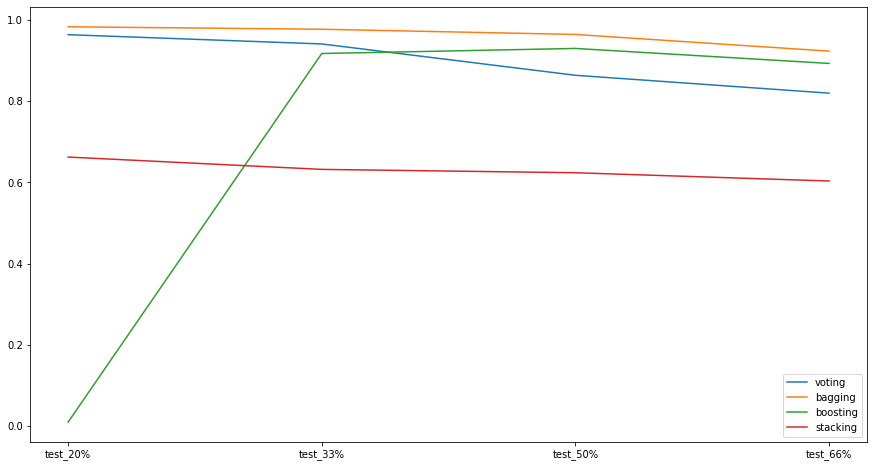

In [76]:
plt.figure(figsize = (15,8))
plt.plot(voting_score_df.columns,list(voting_score_df.loc['accuracy']))
plt.plot(bagging_score_df.columns,list(bagging_score_df.loc['accuracy']))
plt.plot(boosting_score_df.columns,list(boosting_score_df.loc['accuracy']))
plt.plot(stacking_score_df.columns,list(stacking_score_df.loc['accuracy']))
plt.legend(['voting', 'bagging', 'boosting','stacking'])
plt.show()

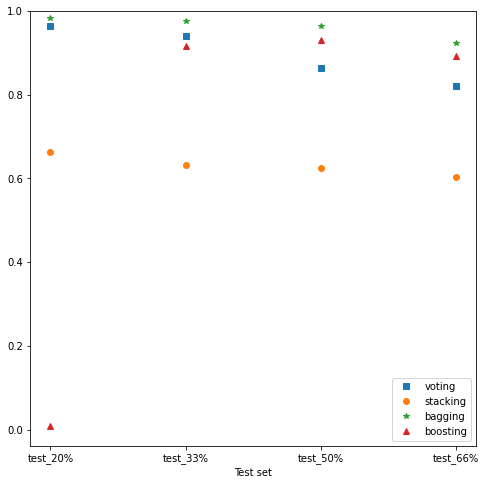

In [77]:
plt.figure(figsize = (8,8))
plt.plot(voting_score_df.columns,list(voting_score_df.loc['accuracy']), 's')
plt.plot(stacking_score_df.columns,list(stacking_score_df.loc['accuracy']),'o')
plt.plot(bagging_score_df.columns,list(bagging_score_df.loc['accuracy']), '*')
plt.plot(boosting_score_df.columns,list(boosting_score_df.loc['accuracy']), '^')
plt.legend(['voting',  'stacking', 'bagging', 'boosting'])
plt.axis(ymax=1)
plt.xlabel("Test set")
plt.show()

##<h5><b>9.2) Scelta del modello migliore</b></h5>
<p>L'algoritmo seguente seleziona il modello migliore tra tutte le predizione effettuate in tutti i set,indica perciò quale set dobbiamo utilizzare e con quale algoritmo utilizzarlo</p>

In [78]:
#creation of the accurancy dataframe
list_score=[voting_score_df, bagging_score_df, boosting_score_df, stacking_score_df]
name_list=['voting', 'bagging', 'boosting', 'stacking']
accurancy_df=pd.DataFrame()
for i in range(0,4):
  df=list_score[i].transpose()
  label=name_list[i]
  accurancy_df.insert(0, label, df['accuracy'])
accurancy_df

stacking  boosting   bagging    voting
test_20%  0.662500  0.009722  0.983333  0.963889
test_33%  0.632155  0.917508  0.977273  0.941077
test_50%  0.623889  0.930000  0.964444  0.863889
test_66%  0.603535  0.893098  0.923401  0.819865

In [79]:
df2=accurancy_df.transpose()
dict2={}
l=[]
for key in keys_list:
  dict2[key]=df2[df2[key]==df2[key].max()][key].to_dict() #dictionary containing for each test set the algorithm with the highest accuracy
  l.append(list(dict2[key].values())) #support list
#find the test set with the best accuracy
max_model=max(l) 
for test, sub_dict in  dict2.items():
  if(list(sub_dict.values())==max_model): #get the best algorithm and test set back
    for model, value in sub_dict.items():
      model_name=model
      test_name=test
print('Il miglior modello è', model_name, ', utilizzando un', test_name)


Il miglior modello è bagging , utilizzando un test_20%


In [80]:
#creation of the best model
error=0
if model_name=='voting':
  clf=voting_model
  report=voting_report[test_name]
  predictions=voting_predict[test_name]
  print('voting') #debug output
elif model_name=='bagging':
  clf=bagging_model
  report=bagging_report[test_name]
  predictions=bagging_predict[test_name]
  print('bagging')
elif model_name=='boosting':
  clf=boosting_model
  report=boosting_report[test_name]
  predictions=boosting_predict[test_name]
  print('boosting')
elif model_name=='stacking':
  clf=stacking_model
  report=stacking_report[test_name]
  predictions=stacking_predict[test_name]
  print('stacking')
else:
  print('Errore nella scelta del modello')
  error=1

bagging


In [81]:
#I get the correct index for the lists
def get_index_from_test(test_name, name_list):
  c=0
  for key in name_list:
    if key==test_name:
      return c
    c+=1
index=get_index_from_test(test_name, keys_list)
index

0

##<h5><b>9.3) Valutazione del modello</b></h5>
<p> Per valutare il modello è stata usata <code> la matrice di confusione</code> assieme alle relative metriche.

###<h5>9.3.1) Report di classificazione</h5>
<p> Il report di classificazione indica:</p>
<ul>
<li>La precisione: nota anche come valore predittivo positivo, viene definito come il numero di previsioni effettuate che sono effettivamente corrette o rilevanti tra tutte le previsioni basate sulla classe positiva </li>
<li>La recall: nota anche come sensibilità, è una misura di un modello per identificare la percentuale di punti dati rilevanti. È definita come il numero di istanze della classe positiva che sono state correttamente previste. Questo è anche noto come tasso di successo, copertura o sensibilità.
<li> La funzione di f1-score: è una metrica che è la media armonica di precisione e richiamo e ci aiuta a ottimizzare un classificatore per una precisione bilanciata e prestazioni di richiam</li>
<li> La support:numero di occorrenze della classe data nel dataset</li>
</ul>

In [82]:
if error!=1:
  index_report=[]
  report_precision=[]
  report_recall=[]
  report_f1=[]
  report_support=[]
  for i in range(0,120):
    item=str(i)
    report_precision.append(report[item]['precision'])
    report_recall.append(report[item]['recall'])
    report_f1.append(report[item]['f1-score'])
    report_support.append(report[item]['support'])
    index_report.append(i)




  report_df=pd.DataFrame(report_precision, index=labels, columns=['precision'])
  report_df.insert(len(report_df.columns), 'recall', report_recall)
  report_df.insert(len(report_df.columns), 'f1-score', report_f1)
  report_df.insert(len(report_df.columns), 'support', report_support)
  start=0
  end=60
  while end<=120:  
    display(report_df[start:end])
    print("")
    start=end
    end+=60
else:
  print("Errore: non sono riuscito a calcolare l'algoritmo migliore")

precision  ...  support
Archeologia                                          1.000000  ...        9
Ingegneria informatica                               0.800000  ...        9
Medicina                                             0.666667  ...        7
Scienze e tecniche psicologiche                      0.833333  ...        7
Scienze Biologiche                                   1.000000  ...        5
Ingegneria dei Sistemi Informativi                   1.000000  ...        7
Scienze zootecniche e tecnologie delle produzio...   1.000000  ...        5
Economia e marketing management                      1.000000  ...        8
Beni Culturali                                       1.000000  ...        8
Scienze della formazione primaria                    1.000000  ...        5
Lingue                                               1.000000  ...        5
Ingegneria gestionale                                1.000000  ...        5
Informatica                                          1.000000  ...        6
Ingegneria Informatica elettronica e delle tele...   0.888889  ...        8
Infermieristica                                      1.000000  ...        3
Giurisprudenza                                       1.000000  ...        6
Scienze naturali                                     1.000000  ...        6
Lettere moderne                                      1.000000  ...        5
Comunicazione                                        1.000000  ...       11
Letteratura Musica e Spettacolo (LMS)                1.000000  ...        7
Chimica e Tecnologia Farmaceutiche                   1.000000  ...        6
Scienze e tecnologie alimentari                      1.000000  ...        6
ECONOMIA                                             1.000000  ...        2
Ingegneria medica                                    1.000000  ...        7
Scienze gastronomiche                                1.000000  ...        4
Mediazione Linguistica Interculturale                1.000000  ...        4
Scienze dell’educazione e dei processi formativi     1.000000  ...        7
Graphic Design                                       1.000000  ...       10
Fisica                                               0.888889  ...        8
Clei                                                 1.000000  ...        8
Biologia                                             1.000000  ...        8
Scienze della comunicazione                          1.000000  ...        8
ingegneria meccanica                                 0.714286  ...        5
Biotecnologie                                        1.000000  ...        5
Scienze politiche, Sociali ed Internazionali         1.000000  ...        3
Comunicazione e media per le industrie creative      1.000000  ...        9
digital marketing                                    1.000000  ...        3
Lingue e letterature straniere                       1.000000  ...        5
Ingegneria Elettronica                               1.000000  ...        2
Economia aziendale                                   1.000000  ...        5
Medicina Veterinaria                                 1.000000  ...        2
Farmacia                                             1.000000  ...        6
Statistica matematica e trattamento informatico...   1.000000  ...        8
Lingue e culture europee                             1.000000  ...        6
Lingue e Culture Moderne                             1.000000  ...        8
Economia e finanza                                   1.000000  ...        5
Management                                           1.000000  ...        4
Scienze e tecnologie informatiche                    1.000000  ...        6
Ingegneria                                           1.000000  ...        8
Dams                                                 1.000000  ...       10
Chimica                                              1.000000  ...        5
Scienze della natura e dell'ambiente                 1.000000  ...        6
Beni culturali e spettac

precision  ...  support
Ingegneria elettronica e informatica                 1.000000  ...        9
Turismo culturale                                    1.000000  ...        3
CIVILTÀ E LINGUE STRANIERE MODERNE                   1.000000  ...        4
Scienze dell’educazione e della formazione           1.000000  ...        5
Interfacce uomo-macchina e tecnologie della com...   1.000000  ...        5
Lettere                                              1.000000  ...        3
Economia e management                                1.000000  ...        8
Storia                                               1.000000  ...        6
Statistica gestionale                                1.000000  ...        5
architettura                                         1.000000  ...        8
Design del prodotto industriale                      1.000000  ...        4
Comunicazione e Media                                1.000000  ...        5
Scienze Motorie  L-22                                1.000000  ...        7
Biologia Molecolare                                  1.000000  ...        8
Scienze giuridiche dell'impresa e delle pubblic...   1.000000  ...        3
scienze politiche relazioni internazionali e di...   1.000000  ...        8
Gestione aziendale                                   1.000000  ...        6
Ingegneria edile e delle costruzioni                 0.777778  ...        7
Scienze psicologiche                                 1.000000  ...        5
Lingue per l’impresa                                 1.000000  ...        4
Economia dei mercati digitali                        1.000000  ...        7
Ingegneria chimica e dei materiali                   1.000000  ...        6
Servizio sociale                                     1.000000  ...        4
Ingegneria ambientale                                0.750000  ...        3
Ingegneria logistica e della Produzione              1.000000  ...        8
Lingue e culture per il turismo e il commercio ...   1.000000  ...        7
Marketing Internazionale                             1.000000  ...        8
Studi filosofici                                     1.000000  ...        3
Direzione d'impresa                                  1.000000  ...        8
Lingua, Cultura, Letteratura e Traduzione            1.000000  ...        7
Scienze del turismo e comunità locale                1.000000  ...        6
Scienze psicologiche per la formazione               1.000000  ...        7
Meccanica                                            1.000000  ...        6
Scienze dell'eduzazione                              1.000000  ...        6
Lettere Musica e Spettacolo                          1.000000  ...        3
Scienze e tecnologie per l'ambiente                  1.000000  ...        7
MEDIAZIONE LINGUISTICA PER IMPRESE E TURISMO         1.000000  ...        7
Psicologia dei processi cognitivi                    1.000000  ...        9
Arti e scienze dello spettacolo                      1.000000  ...        6
Economia e amministrazione delle imprese             1.000000  ...        5
Economia e management: Nuove tecnologie digitali     1.000000  ...        6
Logopedia                                            1.000000  ...        3
Food System                                          1.000000  ...        5
Ingegneria delle tecnologie per la salute            1.000000  ...        2
Automazione industriale                              1.000000  ...        6
Marketing management                                 1.000000  ...        5
Lingue orientali                                     1.000000  ...        7
Scienze ambientali                                   1.000000  ...        6
Montaggio Cinematografico e Televisivo               1.000000  ...        5
Dietistica                                           1.000000  ...        5
Tecniche della prevenzione nell'ambiente e nei ...   1.000000  ...        6
Ostetricia                                           1.000000  ...        4
Scienze dell'architettur

###<h5>9.3.2) Grafico di precisione dei risultati</h5>

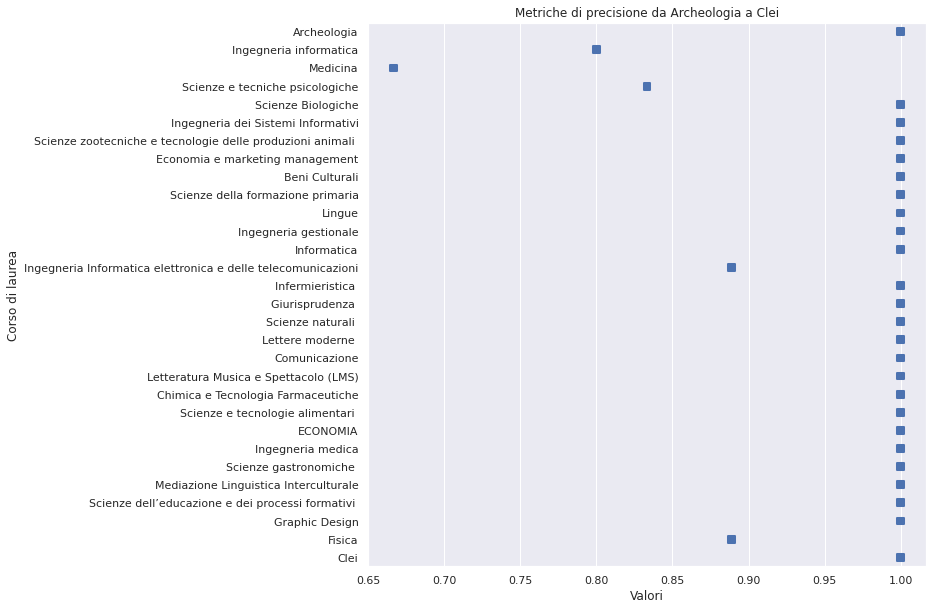

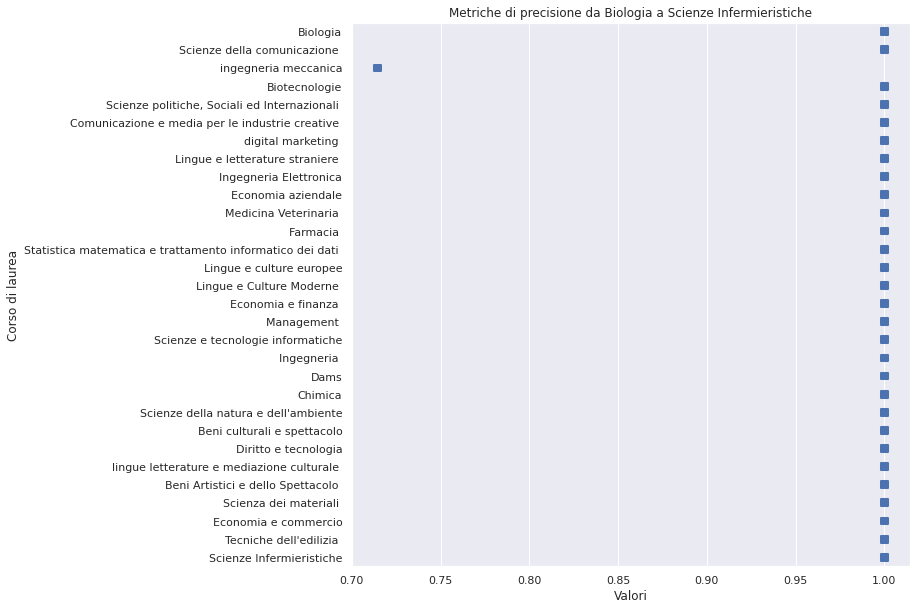

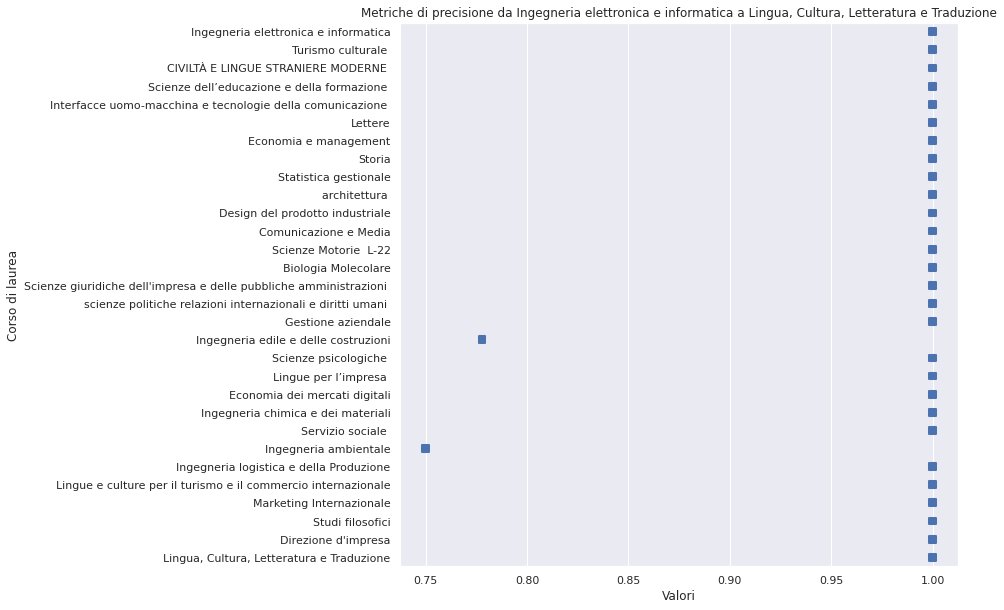

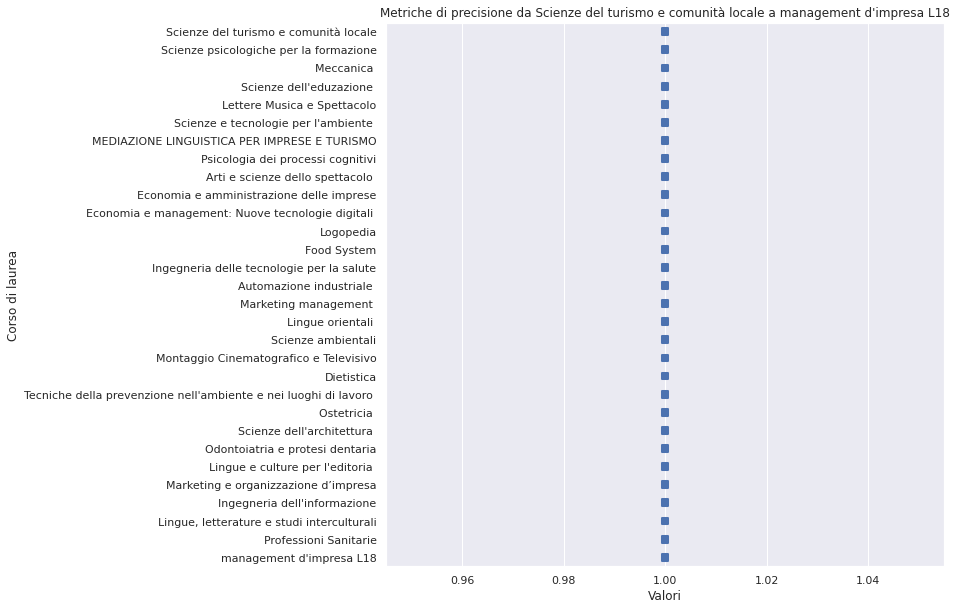

In [83]:
if error!=1:
  start=0
  end=30
  while end <= 120:
    title_str=f'Metriche di precisione da {labels[start]} a {labels[end-1]}'
    plt.figure(figsize = (10,10))
    sns.set(font_scale=1)
    sns.pointplot( x=report_precision[start:end], y=labels[start:end], markers='s', linestyles='')
    plt.title(title_str)
    plt.xlabel("Valori")
    plt.ylabel("Corso di laurea")
    start=end
    end+=30
else:
  print("Errore: non sono riuscito a calcolare l'algoritmo migliore")

###<h5>9.3.1)Matrice di confusione</h5>
<p> La matrice di confusione è stata splittata in 4 grafici per migliorarne la leggibilità</p>

In [84]:
if error!=1:
  cm = confusion_matrix(y_test_list[index], clf.predict(X_test_list[index]))
else:
  print("Errore: non sono riuscito a calcolare l'algoritmo migliore")

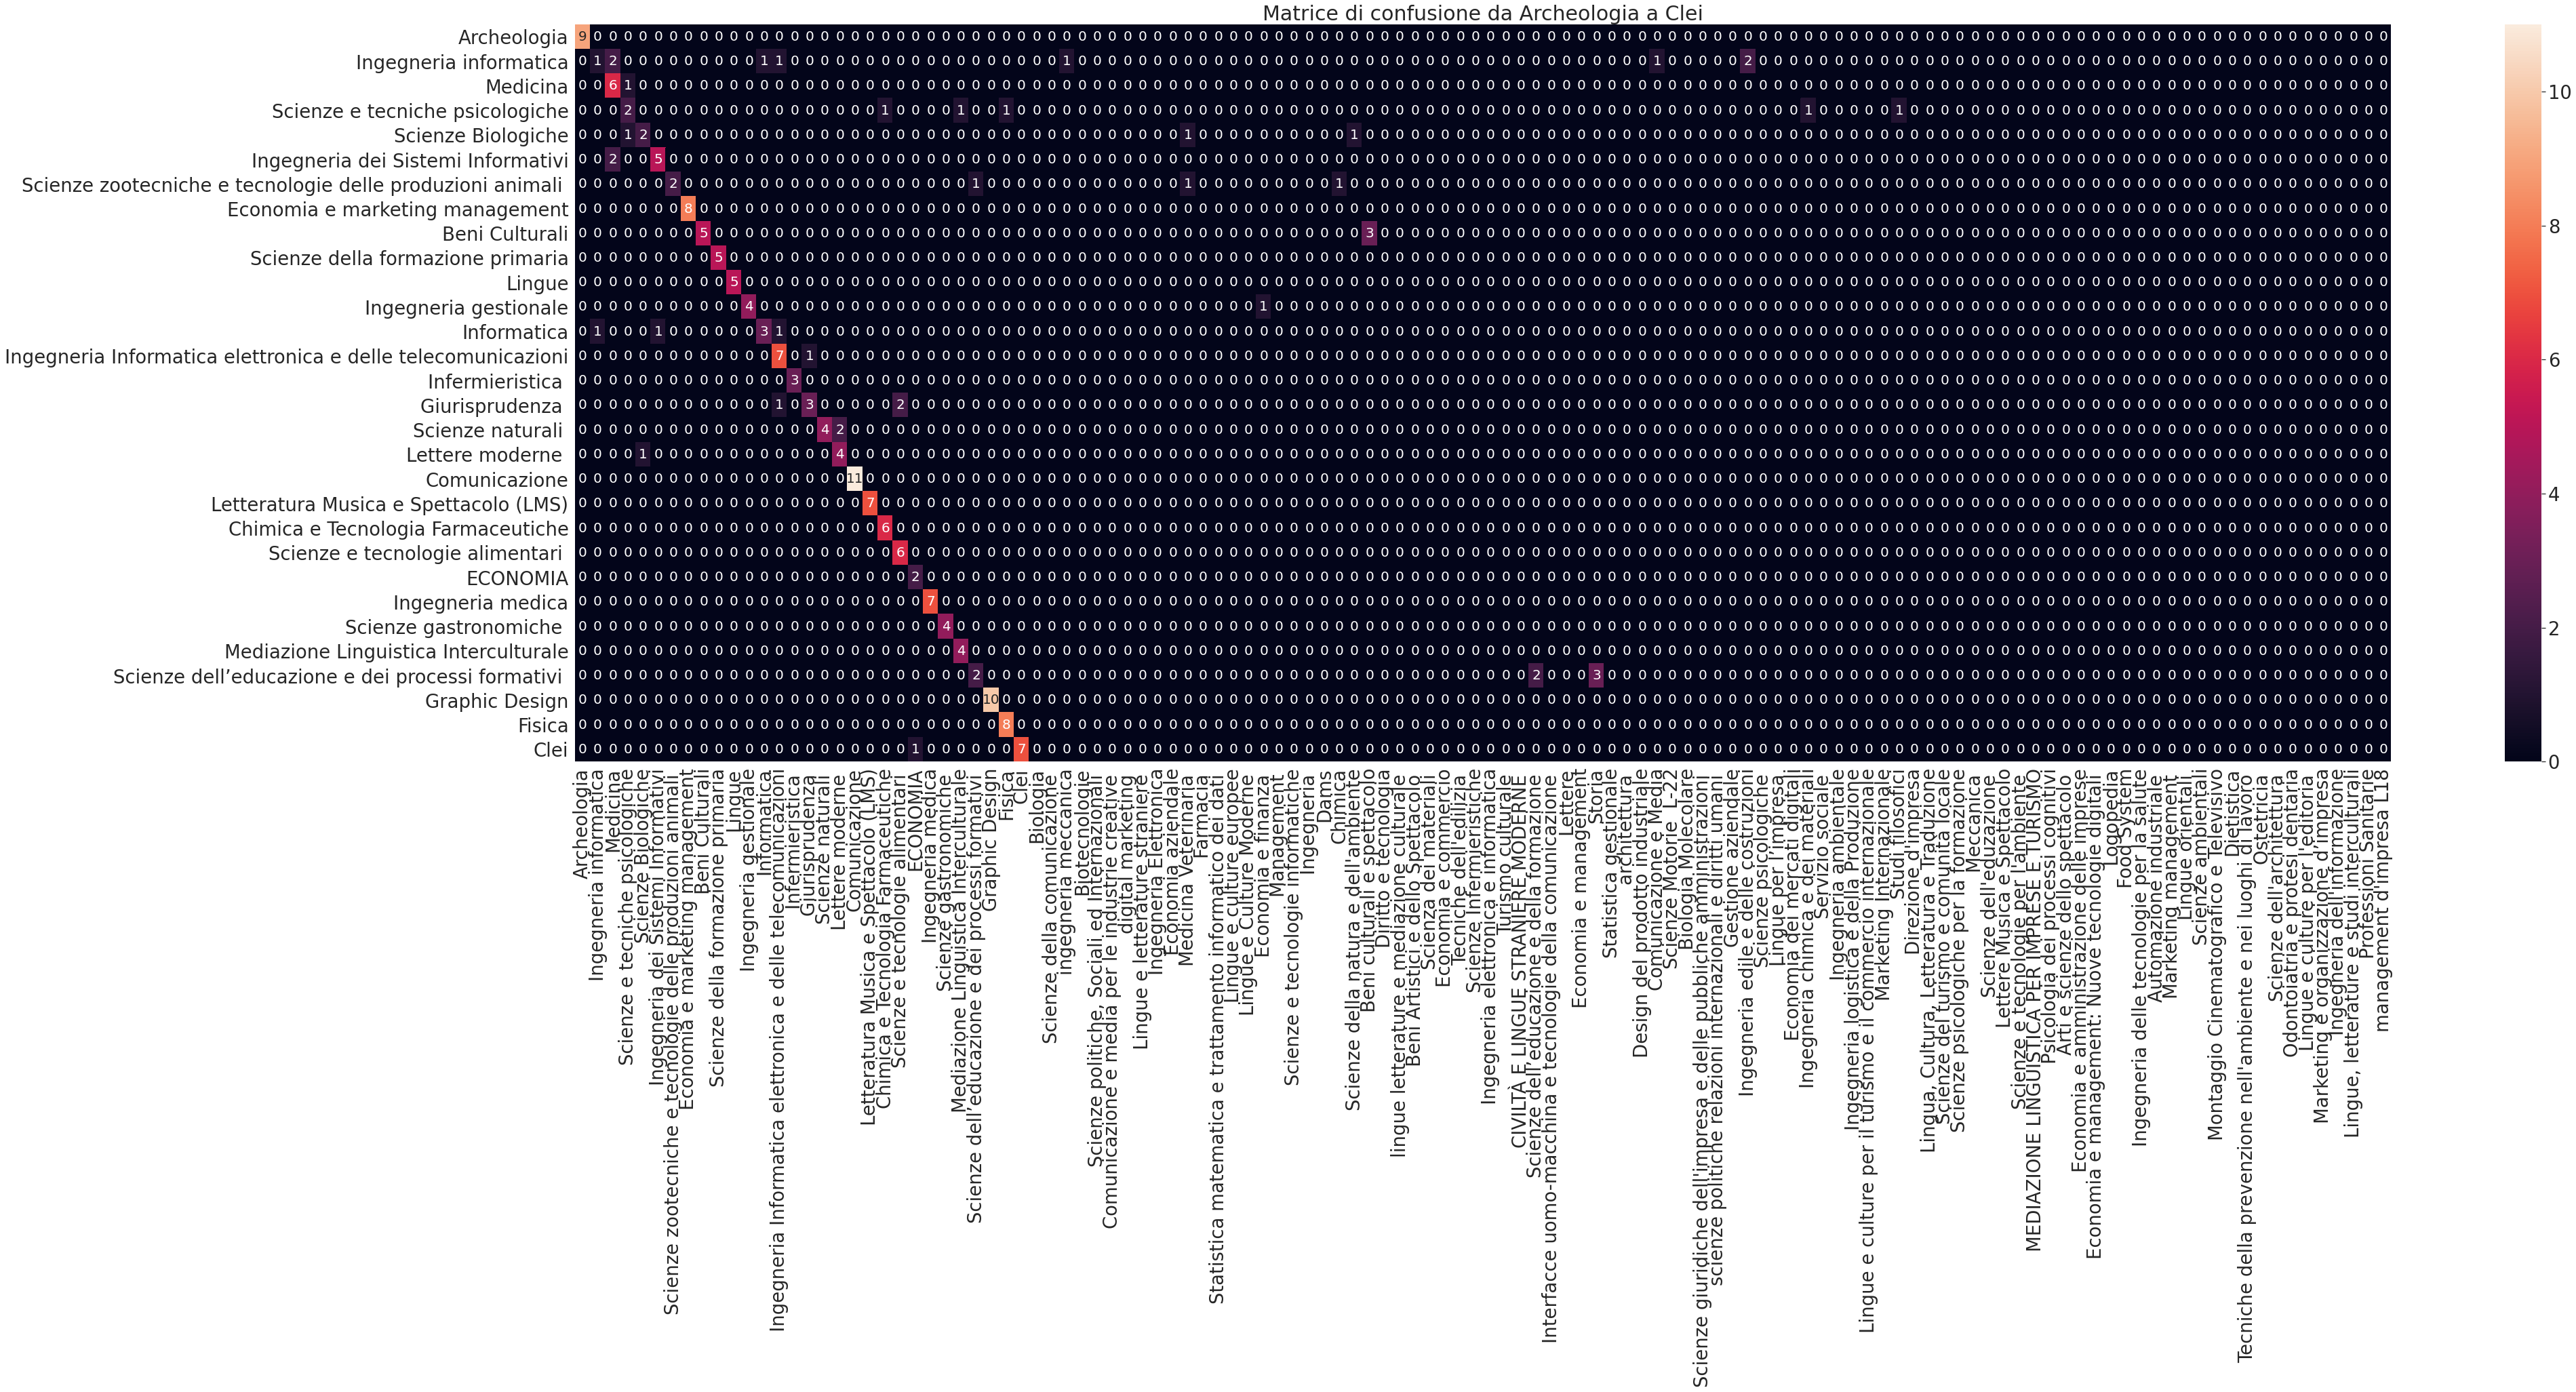

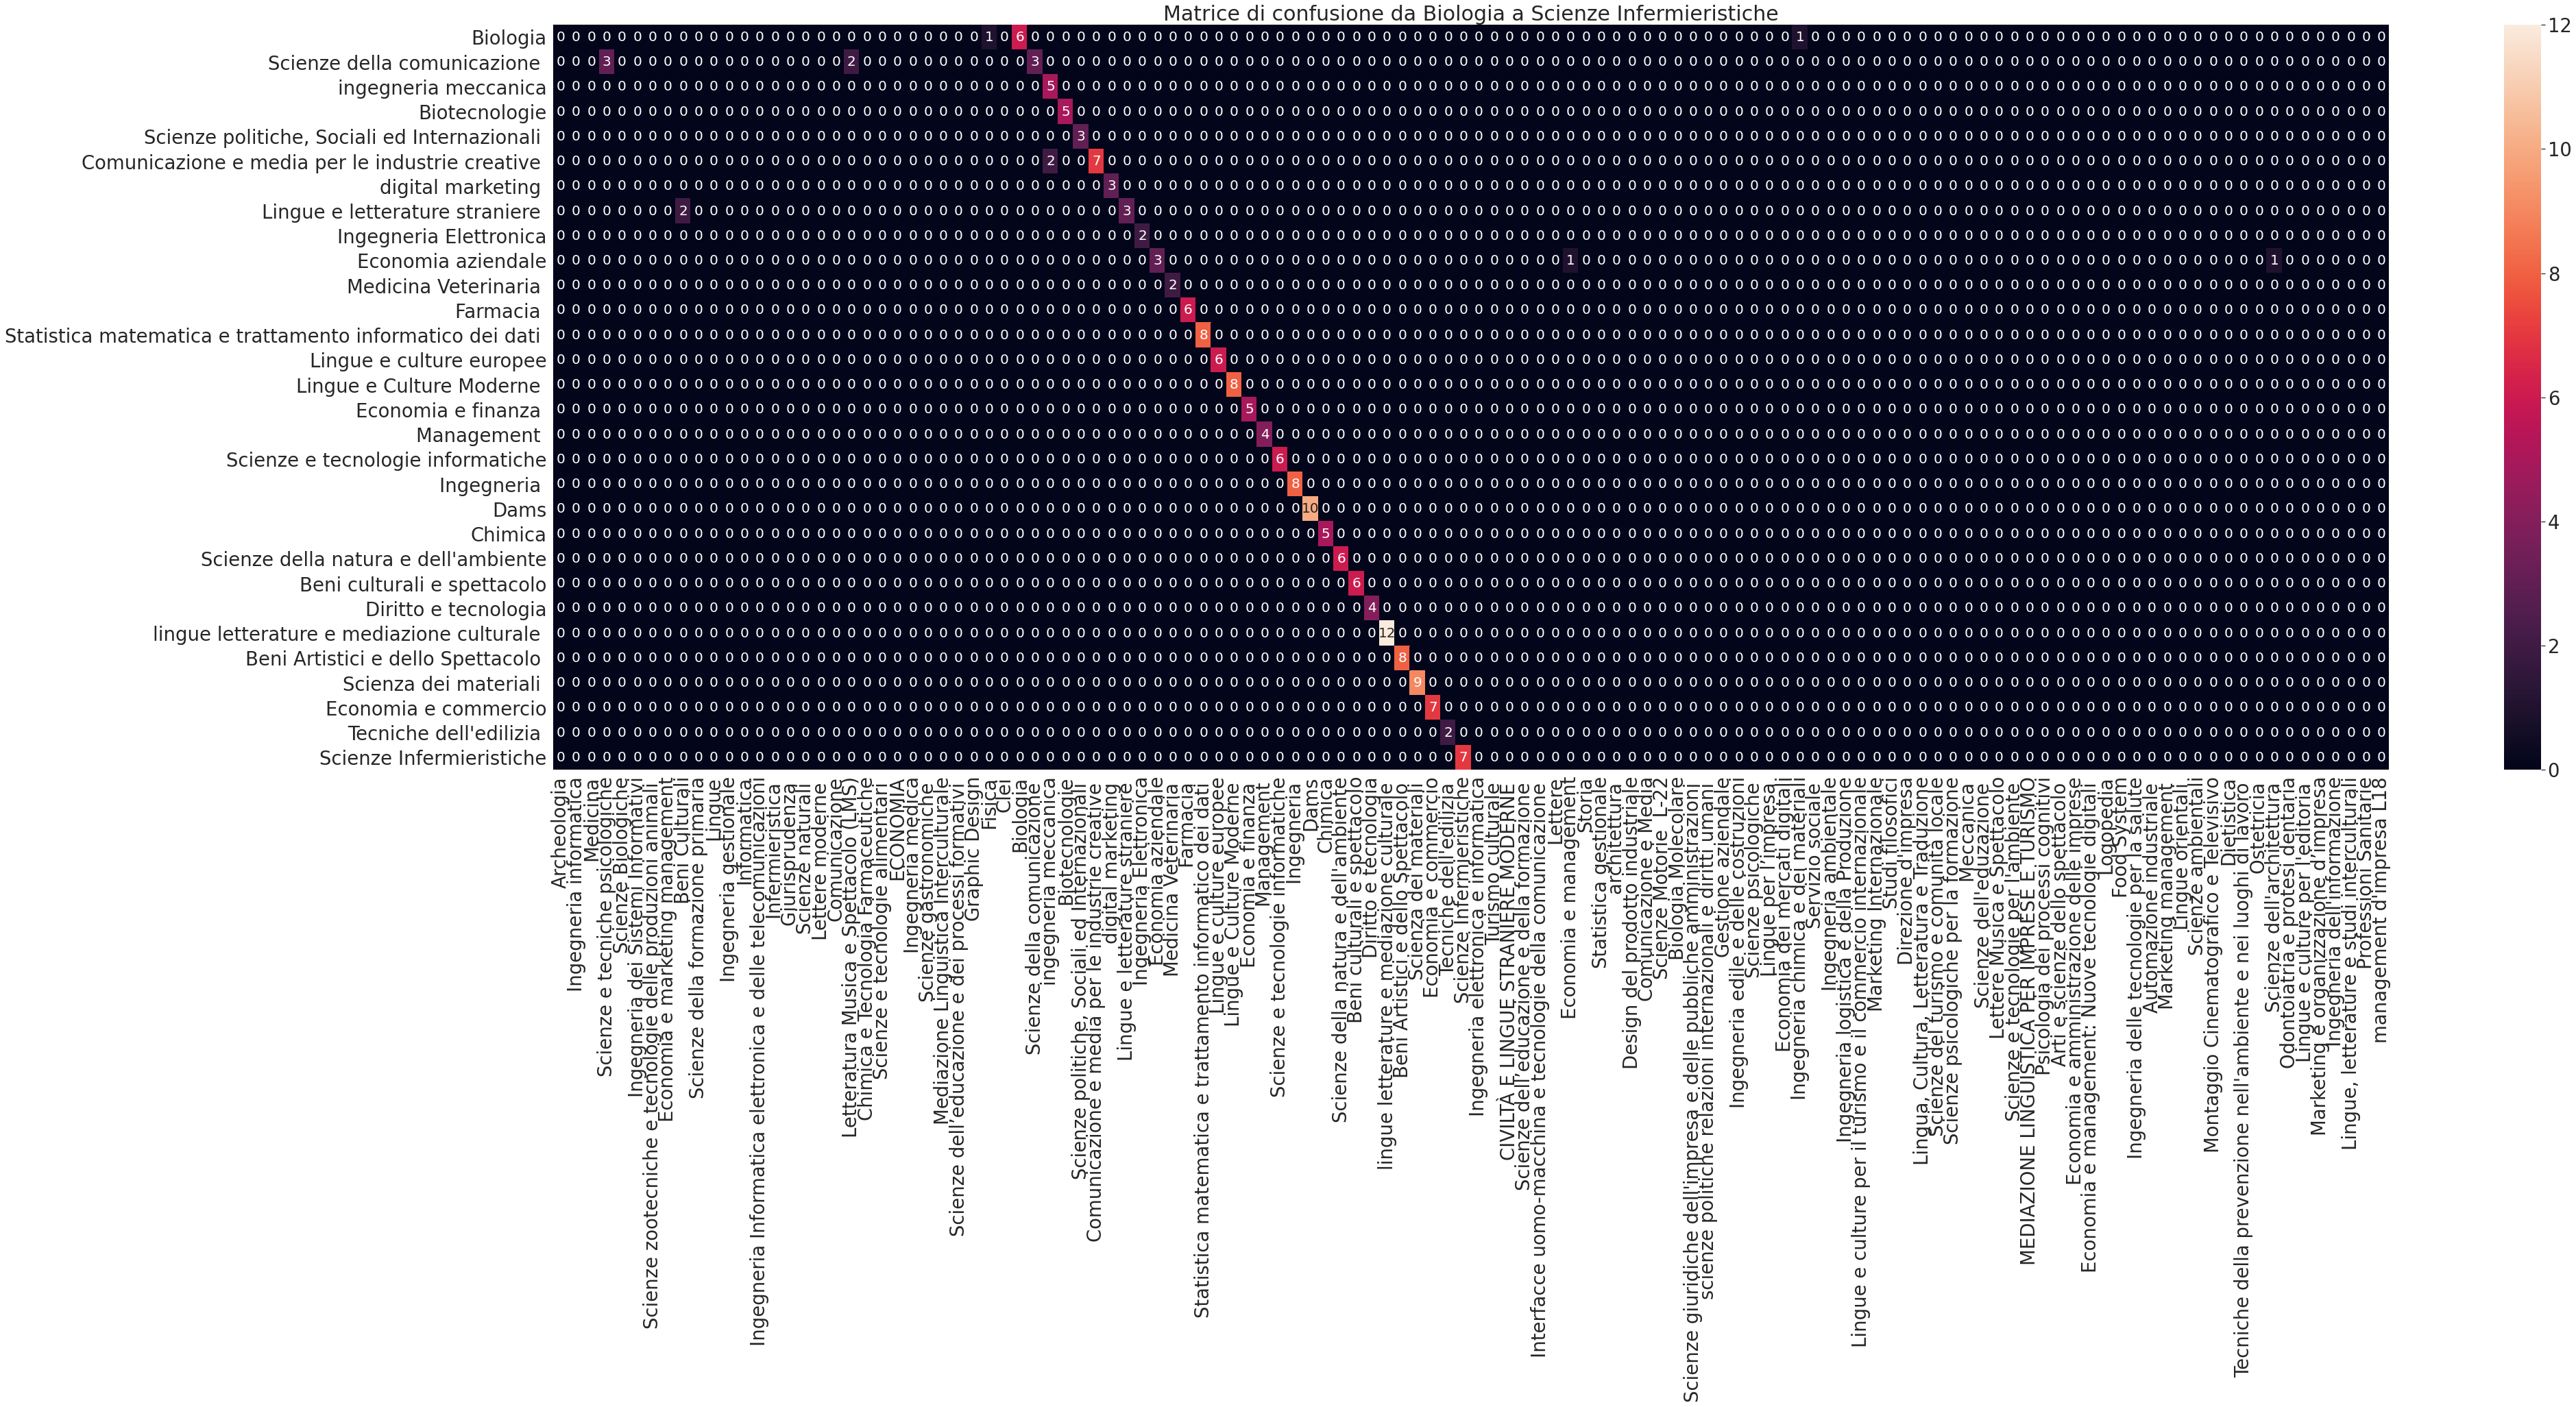

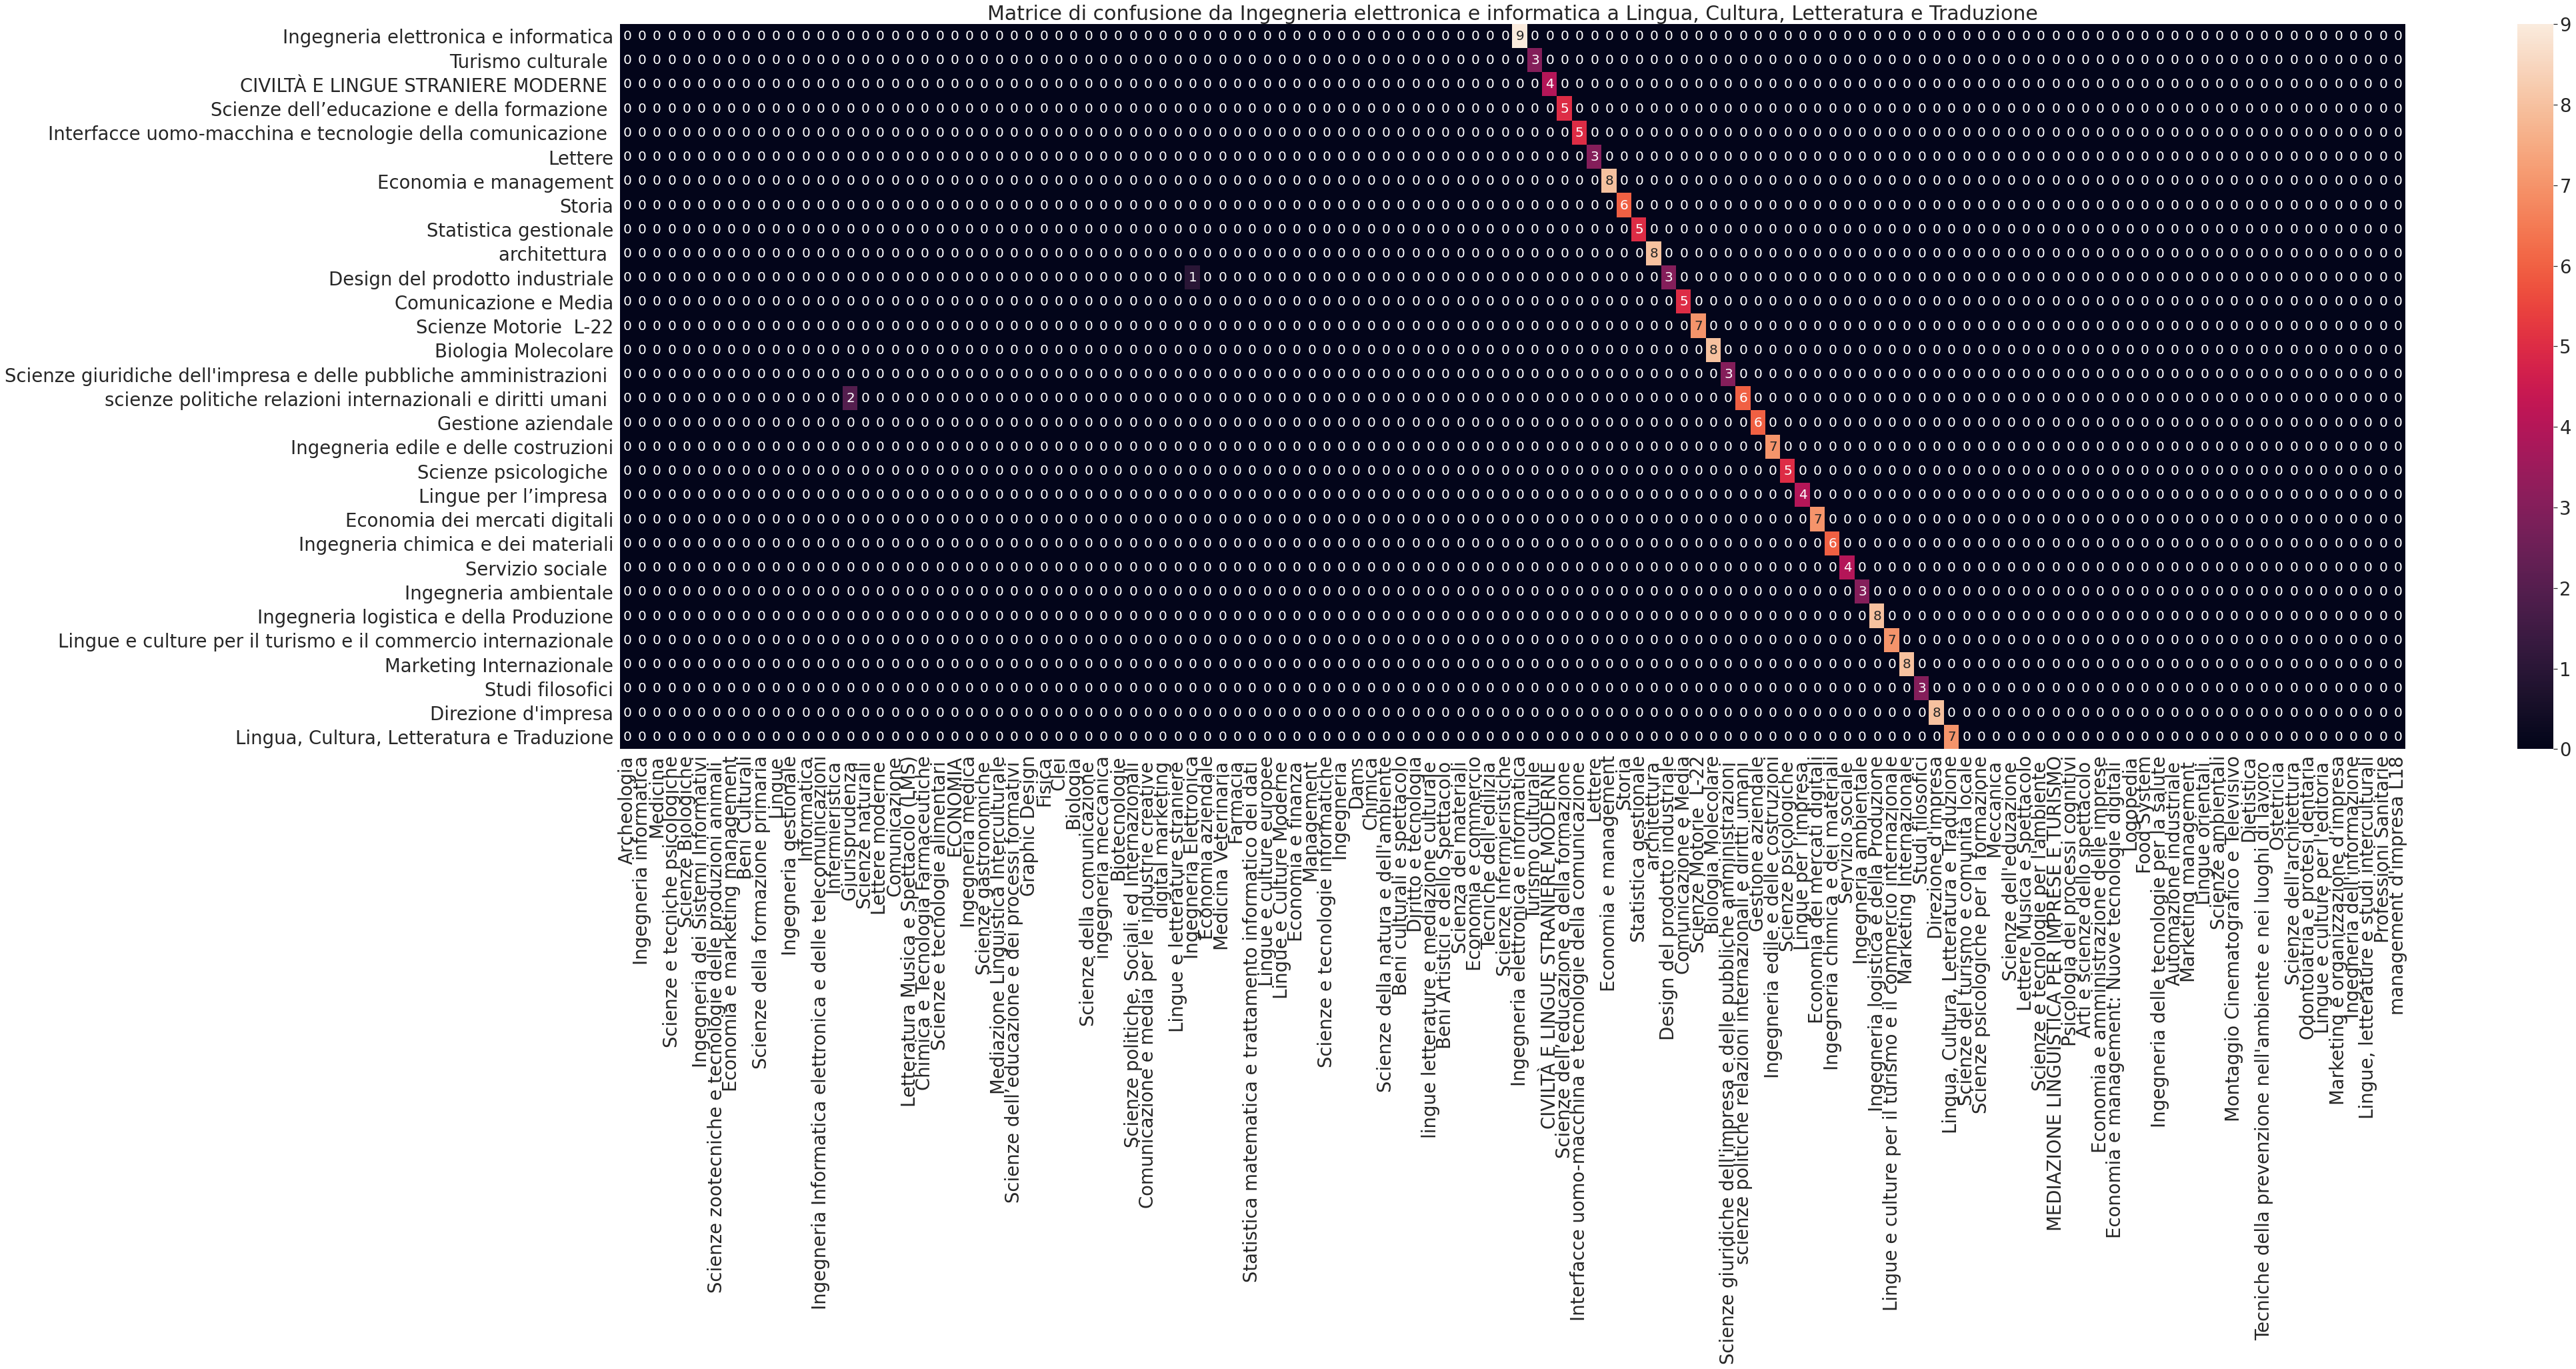

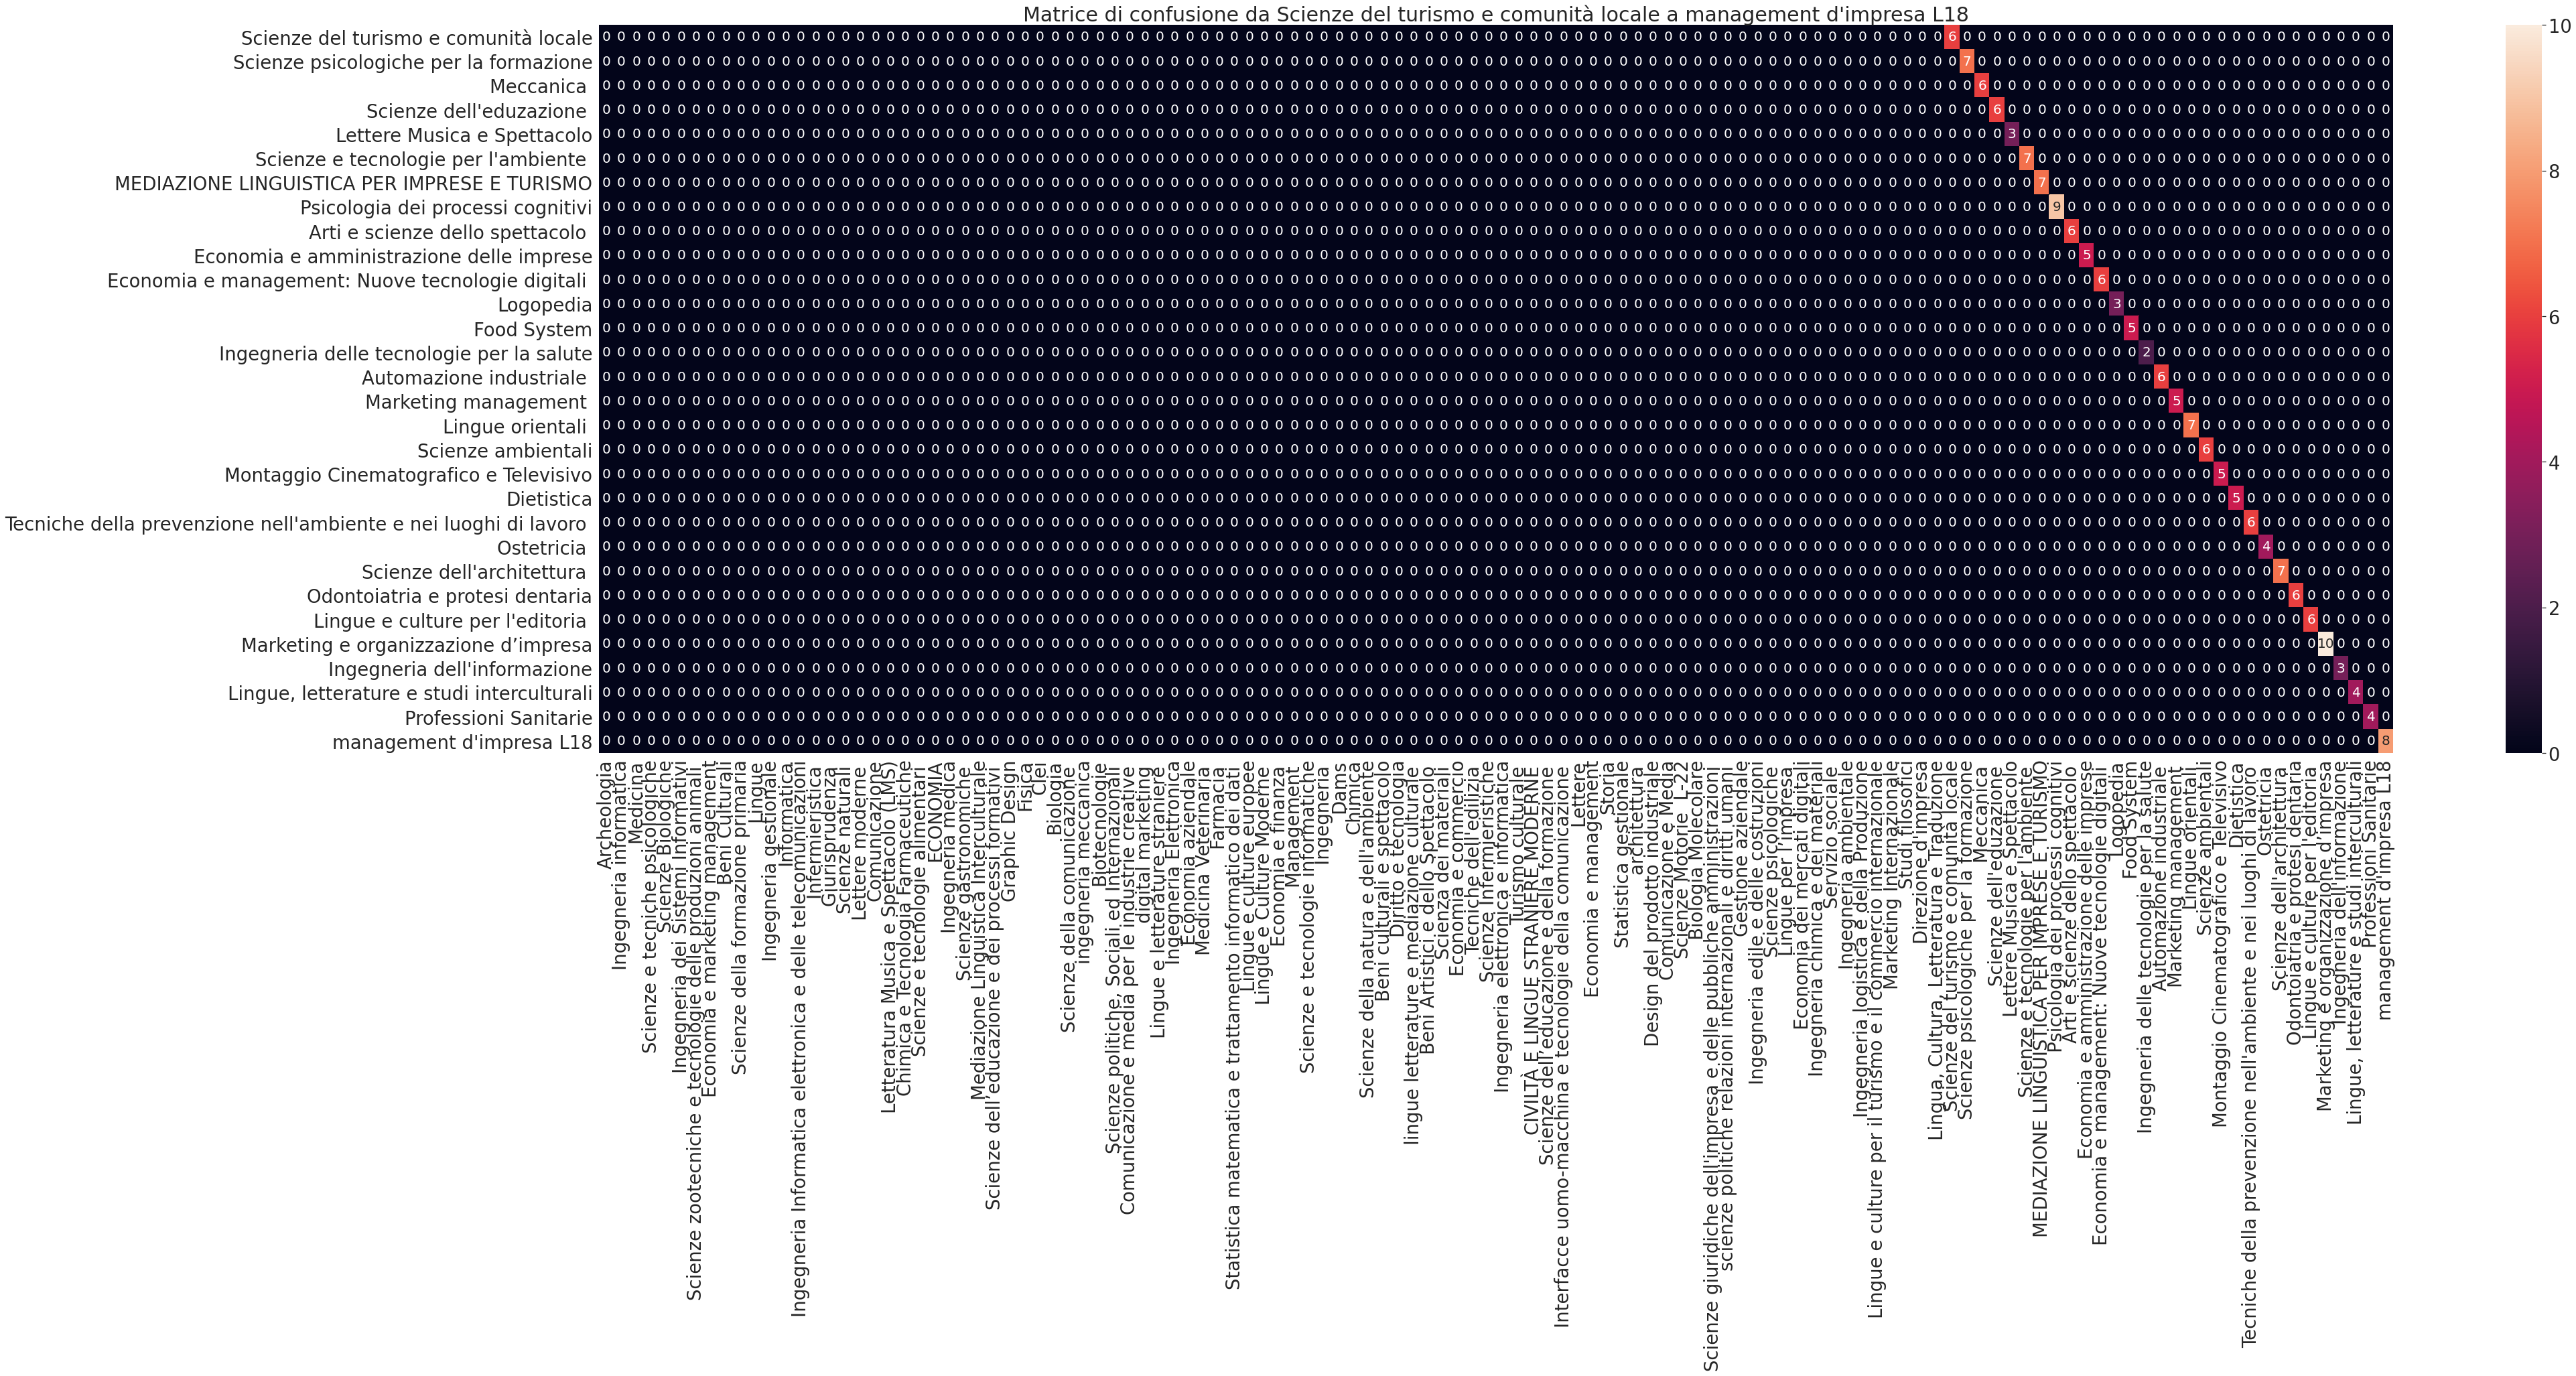

In [85]:
if error!=1:
  start=0
  end=30
  while end <= 120:
    df_cm = pd.DataFrame(cm[start:end, 0:120])
    title_str=f'Matrice di confusione da {labels[start]} a {labels[end-1]}'
    plt.figure(figsize = (60,20))
    sns.set(font_scale=2.5)
    sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 20}, xticklabels=labels[0:120], yticklabels=labels[start:end])# font size
    plt.title(title_str)
    plt.show()
    start=end
    end+=30
    
else:
  print("Errore: non sono riuscito a calcolare l'algoritmo migliore")

#PARTE FINALE DOMANDE A STUDENTE

In [86]:
#@title scelta università { run: "auto", vertical-output: true }
#@markdown Che scuola superiore hai fatto?
scuola_superiore = "Liceo Scientifico" #@param ["Liceo Scientifico", "Istituto tecnico Industriale", "Liceo Classico", "Istituto tecnico economico", "Liceo delle scienze umane"]
#@markdown Principalmente quali sono le materie che hai studiato?
materie_studiate = "Matematica, fisica, informatica, scienze" #@param {type:"string"}
#@markdown Quali sono le tue materie preferite?
materie_preferite = "scienze, chimica" #@param {type:"string"}
#@markdown Quali sono i tuoi hobby?
hobby = "sport, musica, guardare film" #@param {type:"string"}
#@markdown Cosa vorresti fare da grande?
lavoro_sognato = "medico" #@param {type:"string"}
#@markdown Cosa ti aspetti dall'università?
aspettative_universita = "Mi aspetto di imparare molto e essere preparata per il mondo del lavoro" #@param {type:"string"}
#@markdown Perchè vorresti affrontare un percorso universitario?
motivo_scelta_universita = "Voglio continuare a studiare per fare il lavoro dei mie sogni, mi piace soprattutto l'ambito scientifico e medico" #@param {type:"string"}
#@markdown Vorresti continuare i tuoi studi precedenti?
continuare_studi_precedenti = "SI" #@param ["SI", "NO"]




In [87]:
df_answer=pd.DataFrame([scuola_superiore, materie_studiate, materie_preferite, hobby, lavoro_sognato, aspettative_universita, motivo_scelta_universita, continuare_studi_precedenti]).transpose()
df_answer.columns=['scuola_superiore', 'materie_studiate', 'materie_preferite', 'hobby', 'lavoro_sognato', 'aspettative_universita', 'motivo_scelta_universita', 'continuare_studi_precedenti']
df_answer

scuola_superiore  ... continuare_studi_precedenti
0  Liceo Scientifico  ...                          SI

[1 rows x 8 columns]

In [88]:
#gestisci il caso in cui ci sia un valore nullo

In [89]:
df_answer_clean=df_answer.copy()

In [90]:
categorical_features_answer=['scuola_superiore', 'continuare_studi_precedenti']
regex_features=[r'\s\s+'] #delete black space
for feature in df_answer_clean.columns:
  df_answer_clean[feature]=data_cleaning(df_answer_clean[feature], regex_features)
  if feature not in categorical_features_answer:
    df_answer_clean[feature]=preprocessing_text(df_answer_clean,df_answer_clean[feature], feature, 'IT')

In [91]:
df_answer_clean

scuola_superiore  ... continuare_studi_precedenti
0  liceo scientifico  ...                          si

[1 rows x 8 columns]

##One hot encoding

In [92]:
number=0
for class_ in encoder_choice.classes_:
  for value in df_answer_clean['continuare_studi_precedenti']:
    if class_== value:
      print(number)
      df_answer_clean['continuare_studi_precedenti']=number
    else:
      number+=1

1


In [93]:
number=0
for class_ in encoder_school.classes_:
  for value in df_answer_clean['scuola_superiore']:
    if class_== value:
      print(number)
      df_answer_clean['scuola_superiore']=number
    else:
      number+=1

14


In [94]:
df_answer_clean

scuola_superiore  ... continuare_studi_precedenti
0                14  ...                           1

[1 rows x 8 columns]

###Bag of words

In [95]:
#group all the columns in one columns using a list, the we convert the list in string
df_answer_clean['bag_of_words']=df_answer_clean[['materie_studiate', 'hobby' , 'materie_preferite', 'lavoro_sognato' ]].values.tolist()
for index in df_answer_clean['bag_of_words'].index:
  item=df_answer_clean['bag_of_words'].iloc[index]
  listToStr = ' '.join([str(i) for i in item])
  df_answer_clean['bag_of_words'].iloc[index]=listToStr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [96]:
msg_array = vectorizer_train.transform(df_answer_clean['bag_of_words']).toarray()
msg_array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [97]:
vocab = vectorizer_train.get_feature_names()
df_bow_answer=pd.DataFrame(msg_array, columns=vocab)
#CODICE DI TEST
#for key in df_bow_answer:
  #if df_bow_answer[key].values==1:
    #print(key)

In [98]:
#delete the old columns
df_answer_clean=df_answer_clean.drop(['materie_studiate', 'hobby' , 'materie_preferite', 'lavoro_sognato', 'bag_of_words' ], axis=1)


In [99]:
#add the new columns
df_answer_clean=df_answer_clean.set_index(df_bow_answer.index)
df_answer_clean=pd.concat([df_answer_clean,  df_bow_answer], axis=1)
df_answer_clean

scuola_superiore                     aspettative_universita  ... zon  zootecn
0                14  aspett impar molt esser prepar mond lavor  ...   0        0

[1 rows x 915 columns]

###modello TF-IDF

In [100]:
#group all the columns in one columns using a list, then we convert the list in string
df_answer_clean['tf_if']=df_answer_clean[['aspettative_universita', 'motivo_scelta_universita']].values.tolist()
for index in df_answer_clean['tf_if'].index:
  item=df_answer_clean['tf_if'].iloc[index]
  listToStr = ' '.join([str(i) for i in item])
  df_answer_clean['tf_if'].iloc[index]=listToStr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [101]:
msg_array_tf=tv.transform(df_answer_clean['tf_if']).toarray()
msg_array_tf

array([[0., 0., 0., ..., 0., 0., 0.]])

In [102]:
vocab = tv.get_feature_names()
df_tf_answer=pd.DataFrame(msg_array_tf, columns=vocab)

In [103]:
#delete the old columns
df_answer_clean=df_answer_clean.drop(['aspettative_universita', 'motivo_scelta_universita', 'tf_if'], axis=1)


In [104]:
df_answer_clean=df_answer_clean.set_index(df_tf_answer.index)
df_answer_clean=pd.concat([df_answer_clean,  df_tf_answer], axis=1)
df_answer_clean

scuola_superiore  continuare_studi_precedenti  118  ...  zon  zoolog  zootecn
0                14                            1    0  ...  0.0     0.0      0.0

[1 rows x 1932 columns]

In [105]:
df_answer_clean.values.shape

(1, 1932)

In [106]:
prediction_uni=clf.predict(df_answer_clean.values)
for i in prediction_uni:
  uni=i
print(uni)

2


#PARTE FINALE UNIVERSITA'

In [107]:
#indexs=zip(list(df_clean_features.index), index_clean_features)
##df_index=pd.DataFrame(data=indexs, columns=['after_cleaning', 'before_cleaning'])
#df_index

In [108]:
#a=list(df_clean_features[df_clean_features['degree_course']==11].index)
#lst=[]
#for i in a:
 # out=df_index[df_index['after_cleaning']==i]['before_cleaning'].values
 # lst.append(out)
 # print(out)
#print(lst)


In [109]:
all_features_final=df_students_first_degree
all_features_final=all_features_final.append(df_graduate_first_degree, ignore_index=True, verify_integrity=True)
all_features_final=all_features_final.iloc[list(index_clean_features)]

In [110]:
final_features=['degree_course','university','other_uni',  'stars', 'hometown', 'study_town', 'didactic_quality', 'teaching_quality', 'exams_difficulties', 'subjects_difficulties', 'students_relationship', 'laboratories']
df_final=all_features_final[final_features]
df_final.shape

(420, 12)

In [111]:
df_final = df_final[df_final['university'].notna()]
df_final.shape

(415, 12)

In [112]:
df_stars_mean=df_final[df_final['stars'].notna()]
series_review_uni=df_stars_mean.groupby('university')['stars'].mean()
series_review_uni

university
Libera Università Vita Salute San Raffaele MILANO         4.000000
Libera Università di lingue e comunicazione IULM-MI       4.000000
Politecnico di MILANO                                     3.333333
Università Cattolica del Sacro Cuore                      5.000000
Università Telematica Internazionale UNINETTUNO           4.000000
Università Telematica PEGASO                              4.000000
Università Telematica Universitas MERCATORUM              4.500000
Università degli Studi G d'Annunzio CHIETI-PESCARA        5.000000
Università degli Studi INSUBRIA Varese-Como               2.333333
Università degli Studi ROMA TRE                           3.000000
Università degli Studi del MOLISE                         3.000000
Università degli Studi della Campania Luigi Vanvitelli    1.000000
Università degli Studi della TUSCIA                       4.000000
Università degli Studi di BERGAMO                         4.166667
Università degli Studi di BOLOGNA                  

In [113]:
#recupero lauree dato cluster
df2=cluster_labels_degree_course[cluster_labels_degree_course['ClusterLabel']==uni]['full_degree_course']

In [114]:
#recupero uni data laurea
degrees=[]

df=pd.DataFrame()
for degree in df2.unique():
  degrees.append(degree)
  
  df= df.append(list(df_final[df_final['degree_course']==degree][['university',  'didactic_quality', 'teaching_quality', 'exams_difficulties', 'subjects_difficulties', 'students_relationship', 'laboratories']].values))
df.columns=['Università',  'Qualità didattica', 'Qualità insegnanti', 'Difficoltà esami', 'Difficoltà materie', 'Integrazione studentesca', 'Laboratori']
print(degrees)
print(df)
print(np.unique(df['Università']))

['Medicina', 'Medicina e chirurgia ', 'Medicina e Chirurgia', 'Medicina ', 'Corso di laurea in medicina e chirurgia', 'Medicina e Chirurgia ', 'Medicina e chirurgia', 'Corso di medicina e chirurgia']
                                    Università  ...  Laboratori
0   Università degli Studi di ROMA La Sapienza  ...         7.0
0           Università degli Studi di CAGLIARI  ...         4.0
1              Università degli Studi di PARMA  ...         7.0
2              Università degli Studi di PARMA  ...         6.0
3           Università degli Studi di CAGLIARI  ...         8.0
0           Università degli Studi di CAGLIARI  ...         6.0
1           Università degli Studi di CAGLIARI  ...         5.0
2           Università degli Studi di CAGLIARI  ...         1.0
3           Università degli Studi di CAGLIARI  ...         1.0
4           Università degli Studi di CAGLIARI  ...         6.0
5           Università degli Studi di CAGLIARI  ...         1.0
0              Università degli 

In [115]:
valutation_uni=df.groupby('Università')[[ 'Qualità didattica', 'Qualità insegnanti', 'Difficoltà esami', 'Difficoltà materie', 'Integrazione studentesca', 'Laboratori']].mean()

In [116]:
valutation_uni.insert(0, 'Università', valutation_uni.index)

In [117]:
valutation_uni

Università  ...  Laboratori
Università                                                                              ...            
Università degli Studi di CAGLIARI                  Università degli Studi di CAGLIARI  ...    4.363636
Università degli Studi di PARMA                        Università degli Studi di PARMA  ...    5.500000
Università degli Studi di ROMA La Sapienza  Università degli Studi di ROMA La Sapienza  ...    5.666667

[3 rows x 7 columns]

In [118]:
df1 = pd.melt(valutation_uni, id_vars='Università', var_name="type", value_name="valutation")
df1

Università  ... valutation
0           Università degli Studi di CAGLIARI  ...   7.043478
1              Università degli Studi di PARMA  ...   8.500000
2   Università degli Studi di ROMA La Sapienza  ...   6.666667
3           Università degli Studi di CAGLIARI  ...   7.304348
4              Università degli Studi di PARMA  ...   7.500000
5   Università degli Studi di ROMA La Sapienza  ...   6.333333
6           Università degli Studi di CAGLIARI  ...   8.181818
7              Università degli Studi di PARMA  ...   9.000000
8   Università degli Studi di ROMA La Sapienza  ...   9.333333
9           Università degli Studi di CAGLIARI  ...   8.347826
10             Università degli Studi di PARMA  ...   9.000000
11  Università degli Studi di ROMA La Sapienza  ...   8.666667
12          Università degli Studi di CAGLIARI  ...   7.086957
13             Università degli Studi di PARMA  ...   9.250000
14  Università degli Studi di ROMA La Sapienza  ...   6.000000
15          Università degli Studi di CAGLIARI  ...   4.363636
16             Università degli Studi di PARMA  ...   5.500000
17  Università degli Studi di ROMA La Sapienza  ...   5.666667

[18 rows x 3 columns]

In [119]:

title_label="Valutazione per "+ degrees[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


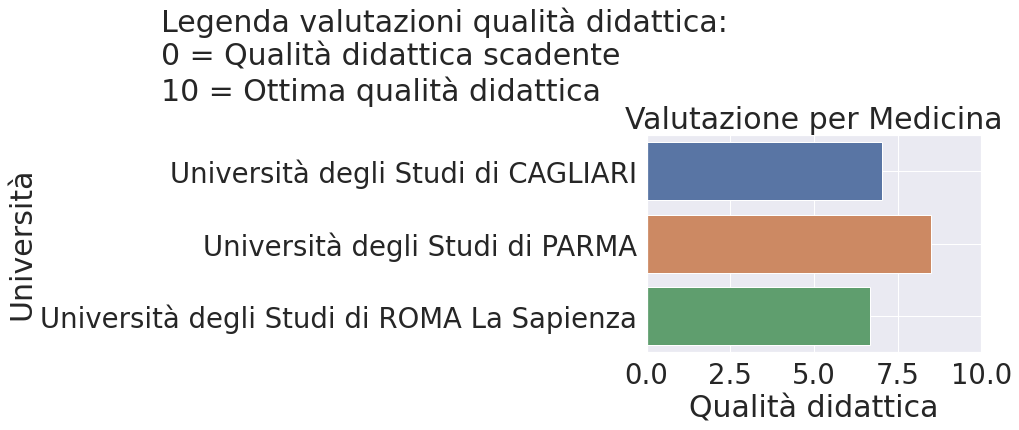

In [120]:
plt.figure()
sns.barplot(valutation_uni['Qualità didattica'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni qualità didattica: \n0 = Qualità didattica scadente \n10 = Ottima qualità didattica")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


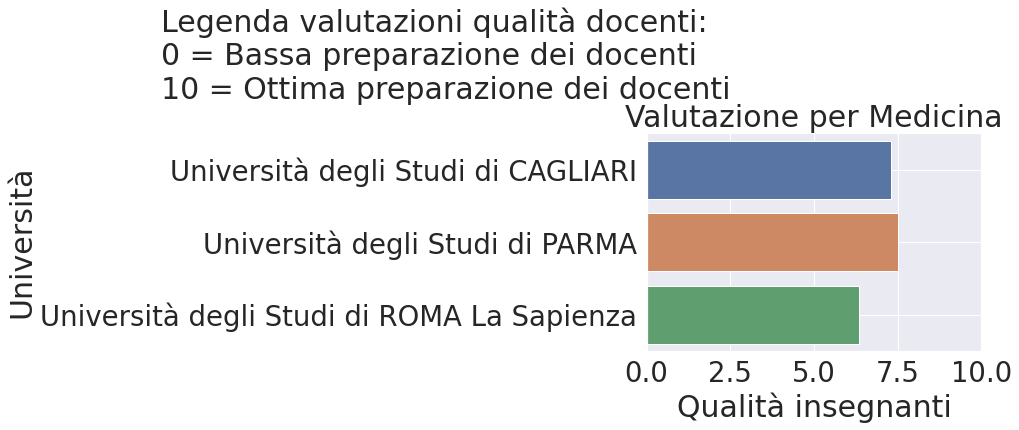

In [121]:
plt.figure()
sns.barplot(valutation_uni['Qualità insegnanti'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni qualità docenti: \n0 = Bassa preparazione dei docenti \n10 = Ottima preparazione dei docenti")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


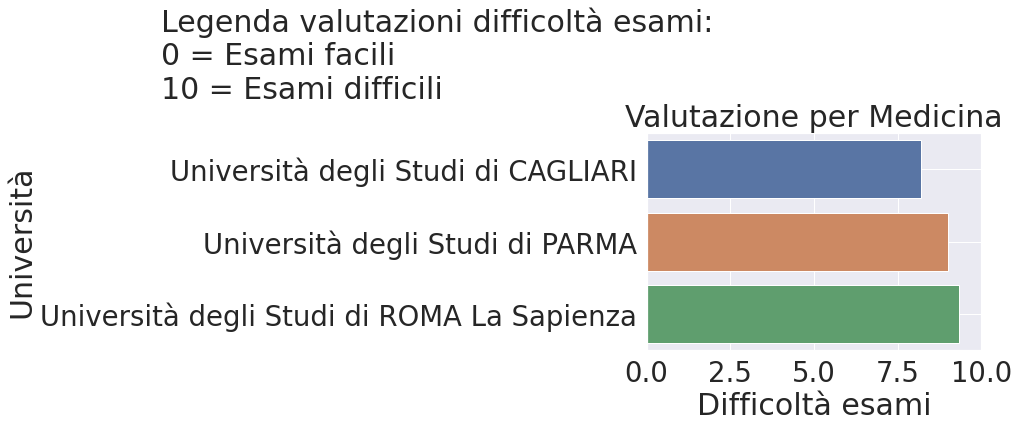

In [122]:
plt.figure()
sns.barplot( valutation_uni['Difficoltà esami'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni difficoltà esami: \n0 = Esami facili \n10 = Esami difficili")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


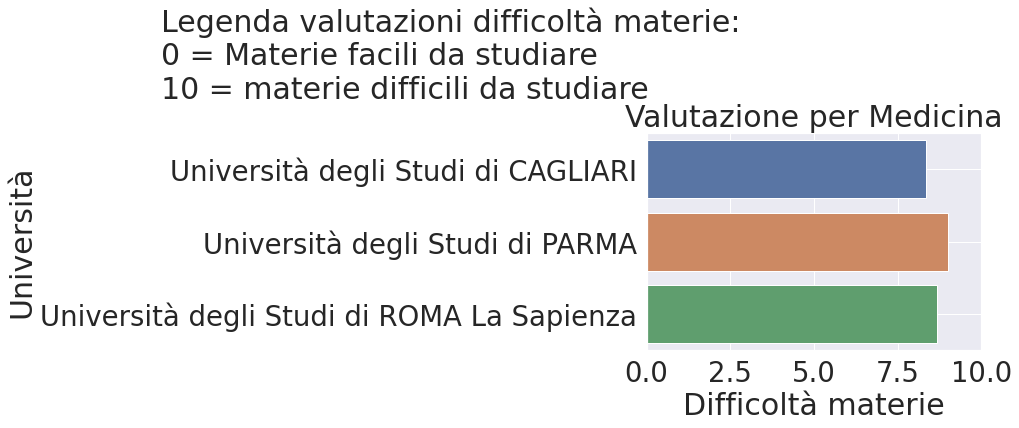

In [123]:
plt.figure()
sns.barplot(valutation_uni['Difficoltà materie'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni difficoltà materie: \n0 = Materie facili da studiare \n10 = materie difficili da studiare")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


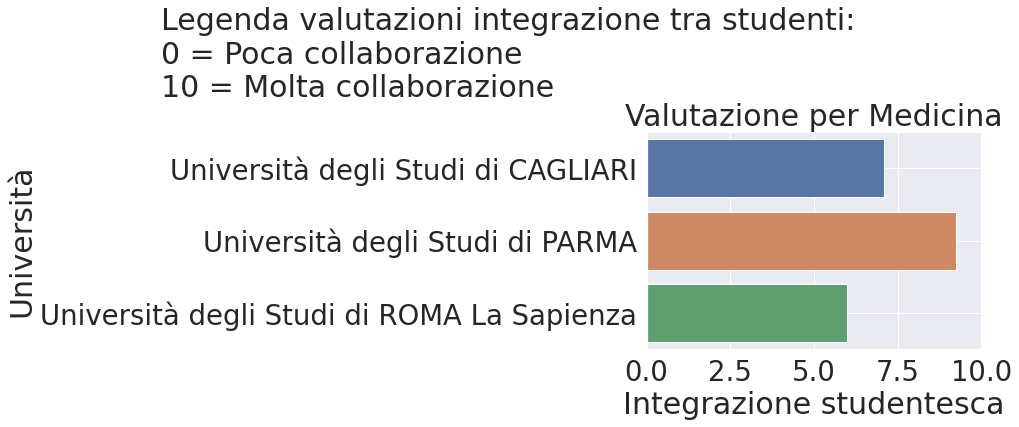

In [124]:
plt.figure()
sns.barplot(valutation_uni['Integrazione studentesca'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni integrazione tra studenti: \n0 = Poca collaborazione \n10 = Molta collaborazione")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


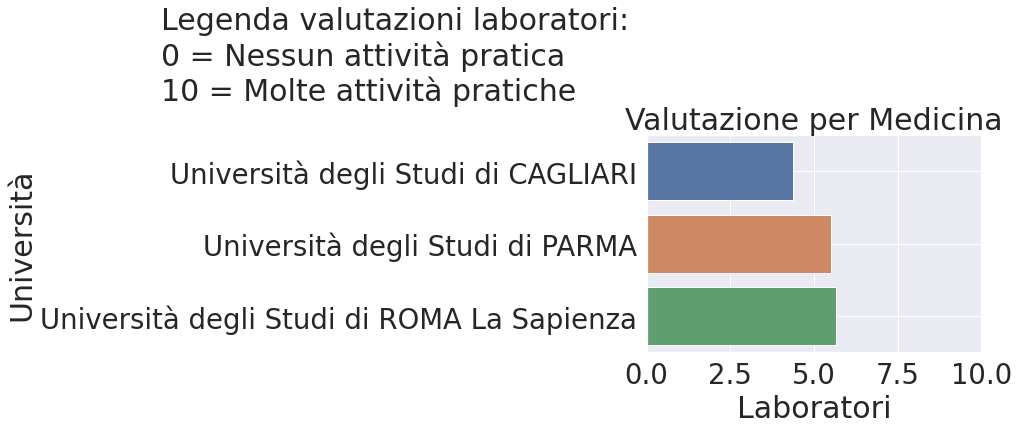

In [125]:
plt.figure()
sns.barplot(valutation_uni['Laboratori'], valutation_uni.index)
plt.grid(axis='y')
plt.xlim((0,10))
plt.title(title_label)
plt.figtext(-1, 1, "Legenda valutazioni laboratori: \n0 = Nessun attività pratica \n10 = Molte attività pratiche")
plt.show()

In [126]:
df_review_uni=series_review_uni.to_frame()
df_review_uni.insert(0, 'university', df_review_uni.index)
degree_review=pd.DataFrame()
for key in valutation_uni.index:
  degree_review=degree_review.append(list(df_review_uni[df_review_uni['university']==key][['university', 'stars']].values))
degree_review.columns=['università', 'stelle']
degree_review

università    stelle
0          Università degli Studi di CAGLIARI  3.517241
0             Università degli Studi di PARMA  3.566038
0  Università degli Studi di ROMA La Sapienza  2.937500

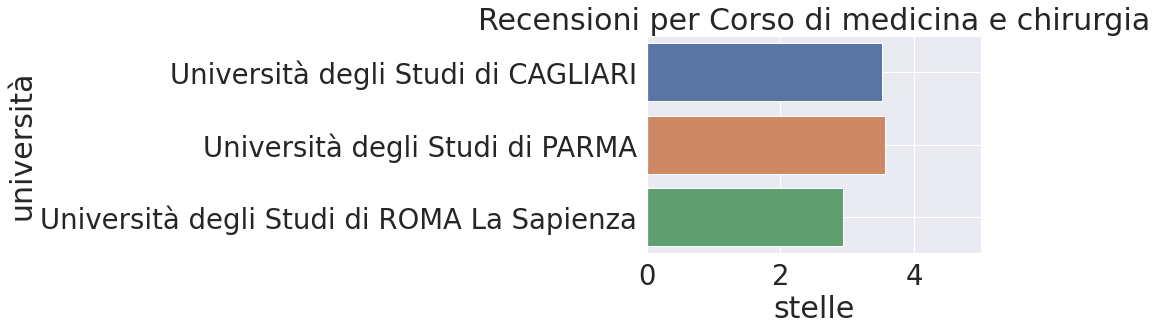

In [127]:
out_images=degree_review
sns.barplot(data=out_images, x='stelle', y='università')
plt.grid(axis='y')
plt.xlim((0,5))
plt.title("Recensioni per " +degree )
plt.show()